In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os



/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# I. About the dataset

We use the dataset **Energy balance matrix** from 1970 to 2021 of Brazil. The dataset is downloaded in the website of 
Olade.

The calculations for data processing base on the **Manual Olade 2011**

## I.1 Load the dataset

In [2]:
# Load the file
file_path = '../datas/Option_B/Brazil_Energy balance matrix.xlsx'
#File excel with multi-sheet_names is read as an Dictionary
Dict = pd.read_excel(file_path, sheet_name=None, skiprows=range(4), skipfooter=3)

for k in Dict.keys():       
    # Round the values of each column in dataframe with 2 decimals
    Dict[k]=Dict[k].applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)
    
    #Ignor the first row (unit) in each df
    Dict[k]=Dict[k][1:]
    
    #Rename of columns in df
    Dict[k].rename(columns={'Unnamed: 0': 'SECTOR','OTHER PRIMARY_x000d_\n':'OTHER PRIMARY'}, inplace=True)   
    
    # Remove space in column names and Sector names
    Dict[k].columns=Dict[k].columns.str.strip()
    Dict[k].SECTOR=Dict[k].SECTOR.str.strip()
  
        
    
    
print(Dict.keys())

# Convert the keys of Dict to only contain the year
for k in list(Dict.keys()):
    k_new = k.split(' - ')[0]
    Dict[k_new] = Dict.pop(k)
    
    Dict[k_new]["Year"]=k_new
        
print('\n')
print(Dict.keys())



#Save the Clean Dictionary in Excel with multi-sheet_names
file_path='../datas/Option_B/Datas_cleaned/Brazil_Energy balance matrix_cleaned.xlsx'
    
with pd.ExcelWriter(file_path) as writer:
    for k, df in Dict.items():
        df.to_excel(writer, sheet_name=k)



dict_keys(['1970 - Brazil', '1971 - Brazil', '1972 - Brazil', '1973 - Brazil', '1974 - Brazil', '1975 - Brazil', '1976 - Brazil', '1977 - Brazil', '1978 - Brazil', '1979 - Brazil', '1980 - Brazil', '1981 - Brazil', '1982 - Brazil', '1983 - Brazil', '1984 - Brazil', '1985 - Brazil', '1986 - Brazil', '1987 - Brazil', '1988 - Brazil', '1989 - Brazil', '1990 - Brazil', '1991 - Brazil', '1992 - Brazil', '1993 - Brazil', '1994 - Brazil', '1995 - Brazil', '1996 - Brazil', '1997 - Brazil', '1998 - Brazil', '1999 - Brazil', '2000 - Brazil', '2001 - Brazil', '2002 - Brazil', '2003 - Brazil', '2004 - Brazil', '2005 - Brazil', '2006 - Brazil', '2007 - Brazil', '2008 - Brazil', '2009 - Brazil', '2010 - Brazil', '2011 - Brazil', '2012 - Brazil', '2013 - Brazil', '2014 - Brazil', '2015 - Brazil', '2016 - Brazil', '2017 - Brazil', '2018 - Brazil', '2019 - Brazil', '2020 - Brazil', '2021 - Brazil'])


dict_keys(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '19

In [3]:
df_2021=Dict['2021']

In [4]:
df_2021.columns  

#LPG stands for Liquefied Petroleum Gas

Index(['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY',
       'TOTAL PRIMARIES', 'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY', 'NON-ENERGY', 'TOTAL SECUNDARIES', 'TOTAL',
       'Year'],
      dtype='object')

## I.2 Frist visualization of energy balance (Supply-Transformation-Consumption)

In [5]:
Dict1=Dict.copy()

for k in Dict1.keys():
    selected_columns = ['SECTOR', 'TOTAL PRIMARIES', 'TOTAL SECUNDARIES', 'TOTAL','Year']
    Dict1[k]=Dict1[k][selected_columns]
    selected_rows=['TOTAL SUPPLY','TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict1[k]=Dict1[k][Dict1[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict1.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    
# Get the df "TOTAL SUPPLY"

df_TS=df_conc.loc[df_conc["SECTOR"]=="TOTAL SUPPLY"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TS='../datas/Option_B/Datas_cleaned/TOTAL_SUPPLY_Brazil.xlsx'
df_TS.to_excel(file_TS)

# Get the df "TOTAL TRANSFORMATION"

df_TT=df_conc.loc[df_conc["SECTOR"]=="TOTAL TRANSFORMATION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TT='../datas/Option_B/Datas_cleaned/TOTAL_TRANSFORMATION_Brazil.xlsx'
df_TT.to_excel(file_TT)

# Get the df "FINAL CONSUMPTION"

df_TC=df_conc.loc[df_conc["SECTOR"]=="FINAL CONSUMPTION"].drop(columns=["SECTOR"], axis=1)

#Save this df_TS to excel:
file_TC='../datas/Option_B/Datas_cleaned/FINAL CONSUMPTION_Brazil.xlsx'
df_TC.to_excel(file_TC)


df_TS.head()

,TOTAL PRIMARIES,TOTAL SECUNDARIES,TOTAL
Year,,,
1970,67176.64,30633.82,66742.4
1971,69391.7,34509.96,70092.03
1972,76197.42,38477.46,75111.33
1973,83252.49,45191.03,81963.44
1974,87620.68,50406.2,87628.2


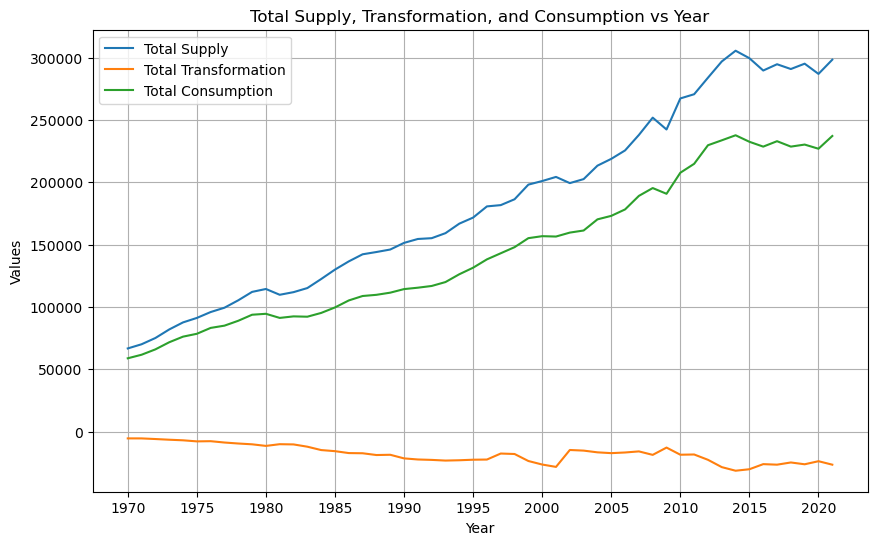

In [6]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=( 10,6))

# Plot Total Supply
sns.lineplot(data=df_TS, x=df_TS.index, y='TOTAL', label='Total Supply', ax=ax)

# Plot Total Transformation
sns.lineplot(data=df_TT, x=df_TT.index, y='TOTAL', label='Total Transformation', ax=ax)

# Plot Total Consumption
sns.lineplot(data=df_TC, x=df_TC.index, y='TOTAL', label='Total Consumption', ax=ax)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Values')
ax.set_title('Total Supply, Transformation, and Consumption vs Year')
ax.set_xticks(df_TS.index[::5])

# Show the legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

## I.3 SUPPLY

### I.3.1. Preview the Total Supply of Primary Sources

The primary sources include: **'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY'**

In [7]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS1 = df_TS1.apply(lambda column: column.fillna(0))
    
df_TS1.head()


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,25664.25,180.02,2235.39,3421.52,0,0.0,31851.53,3600.70,223.24,67176.64
1971,27222.25,279.11,2294.86,3713.63,0,0.0,31807.22,3841.81,232.82,69391.70
1972,32473.41,313.00,2311.25,4356.82,0,0.0,32143.13,4298.39,301.43,76197.42
1973,38778.41,358.06,2287.08,4976.55,0,0.0,31897.40,4644.41,310.58,83252.49
1974,41479.10,544.45,2384.82,5646.13,0,0.0,32598.64,4618.65,348.89,87620.68


In [8]:
# Check if any columns have negative values
def negative_values(df):
    columns_with_negative_values = df.columns[df.lt(0).any()]
    # Count the number of negative values in each column
    negative_values_count = df.lt(0).sum()

    # Print the columns with negative values (if any)
    if not columns_with_negative_values.empty:
        print("Columns with negative values:")
        print(columns_with_negative_values)
        # Print the count of negative values in each column
        print("Number of negative values in each column:")
        print(negative_values_count)
    else:
        print("No columns have negative values.")
        
negative_values(df_TS1)

Columns with negative values:
Index(['NUCLEAR'], dtype='object')
Number of negative values in each column:
OIL                       0
NATURAL GAS               0
COAL                      0
HYDROENERGY               0
GEOTHERMAL                0
NUCLEAR                   1
FIREWOOD                  0
SUGARCANE AND PRODUCTS    0
OTHER PRIMARY             0
TOTAL PRIMARIES           0
dtype: int64


<Figure size 1000x600 with 0 Axes>

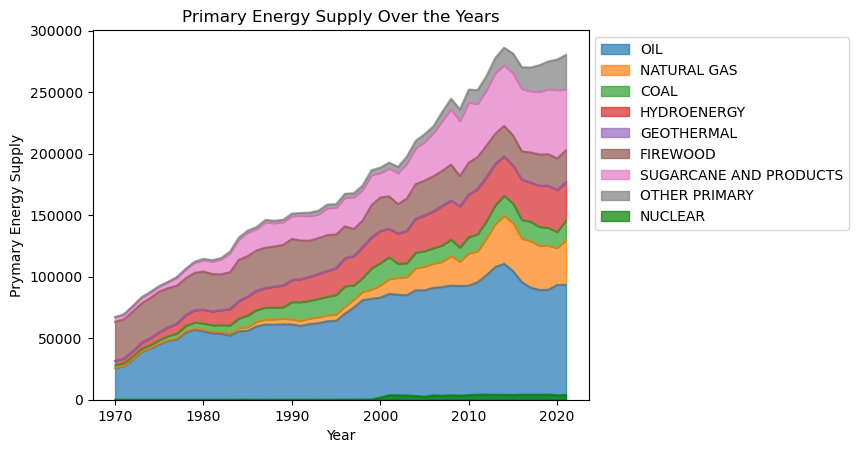

In [9]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Separate the positive and negative parts of the 'NUCLEAR' column
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()

# Plot the stack plot for positive and negative parts separately
plt.figure(figsize=(10, 6))  # Set the figure size if needed
ax = df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7)
positive_nuclear.plot(kind='area', ax=ax, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax, color='red', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Prymary Energy Supply')
plt.title('Primary Energy Supply Over the Years')

# Move the legend directly to the figure
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

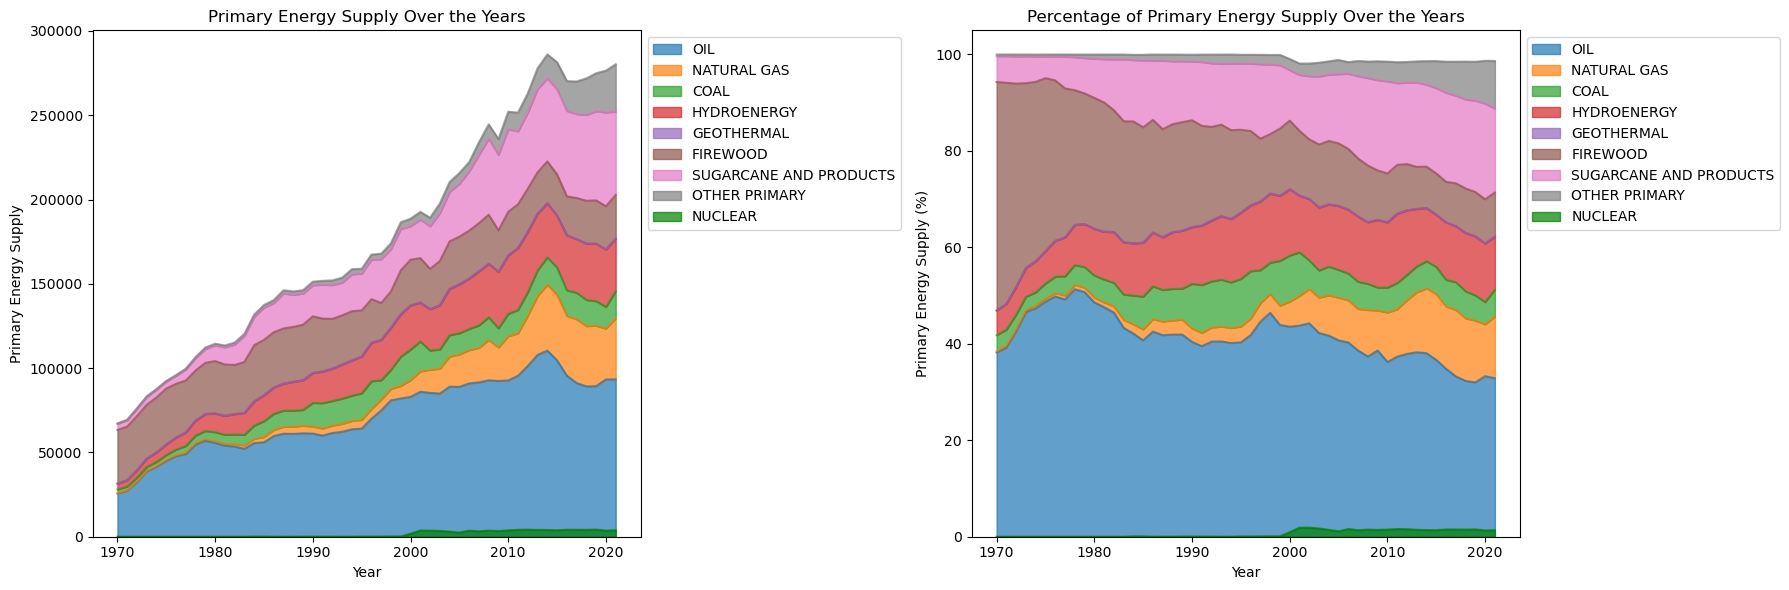

In [10]:
# Drop the 'TOTAL PRIMARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS1.drop(columns="TOTAL PRIMARIES")

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns = ['OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL', 'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY']
df_TS1_percentages = (df_stackplot[percentage_columns].div(df_TS1['TOTAL PRIMARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# First stack plot for Primary Energy Supply
positive_nuclear = df_stackplot['NUCLEAR'].clip(lower=0)
#negative_nuclear = df_stackplot['NUCLEAR'].clip(upper=0).abs()
df_stackplot.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax1)#drop(columns='NUCLEAR').
positive_nuclear.plot(kind='area', ax=ax1, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear.plot(kind='area', ax=ax1, color='red', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Primary Energy Supply')
ax1.set_title('Primary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Second stack plot for Percentage of Primary Energy Supply
positive_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(lower=0)
#negative_nuclear_percent = df_TS1_percentages['NUCLEAR'].clip(upper=0).abs()
df_TS1_percentages.drop(columns='NUCLEAR').plot.area(stacked=True, alpha=0.7, ax=ax2)
positive_nuclear_percent.plot(kind='area', ax=ax2, color='green', alpha=0.7, label='NUCLEAR')
#negative_nuclear_percent.plot(kind='area', ax=ax2, color='red', alpha=0.7)
ax2.set_xlabel('Year')
ax2.set_ylabel('Primary Energy Supply (%)')
ax2.set_title('Percentage of Primary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [11]:
df_2021.SECTOR

1                                PRODUCTION
2                                    IMPORT
3                                    EXPORT
4                              STOCK CHANGE
5                                    UNUSED
6                              TOTAL SUPPLY
7                                REFINERIES
8                              POWER PLANTS
9                            SELF-PRODUCERS
10                               GAS PLANTS
11                          CHARCOAL PLANTS
12    COKE PLANTS AND BLAST FURNACES_x000d_
13                             DISTILLERIES
14                            OTHER CENTERS
15                     TOTAL TRANSFORMATION
16                          OWN CONSUMPTION
17                                   LOSSES
18                               ADJUSTMENT
19                                TRANSPORT
20                               INDUSTRIAL
21                              RESIDENTIAL
22             COMMERCIAL, SERVICES, PUBLIC
23          AGRICULTURE, FISHING

In [12]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
       'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['IMPORT', 'EXPORT']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_IMP_EXP=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_IMP_EXP = df_IMP_EXP.apply(lambda column: column.fillna(0))
    
df_IMP_EXP.head(5)


,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,TOTAL PRIMARIES
Year,,,,,,,,,,
1970,17845.05,0.0,1358.47,0,0,0.0,0.0,0,0,19203.53
1970,65.05,0.0,0.00,0,0,0.0,0.0,0,0,65.05
1971,20434.56,0.0,1155.91,0,0,0.0,0.0,0,0,21590.47
1971,766.34,0.0,0.00,0,0,0.0,0.0,0,0,766.34
1972,25706.19,0.0,1283.81,0,0,0.0,0.0,0,0,26990.00


### I.3.2 Preview of the Total Supply of secondary energy sources

The secondary energy ensources include: **'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY'**

In [13]:
Dict2=Dict.copy()

for k in Dict2.keys():
    selected_columns = ['SECTOR',  'ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL',
       'KEROSENE/JET FUEL', 'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL',
       'GASES', 'OTHER SECONDARY','NON-ENERGY', 'TOTAL SECUNDARIES','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TOTAL SUPPLY']#,'TOTAL TRANSFORMATION','FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    df_TS2=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TS2 = df_TS2.apply(lambda column: column.fillna(0))
    
df_TS2.head()

# Calculate the percentage of each product relative to 'TOTAL PRIMARIES'
percentage_columns_2 = ['ELECTRICITY', 'LPG', 'GASOLINE/ALCOHOL', 'KEROSENE/JET FUEL',
       'DIESEL OIL', 'FUEL OIL', 'COKE', 'CHARCOAL', 'GASES',
       'OTHER SECONDARY', 'NON-ENERGY']
df_TS2_percentages = (df_TS2[percentage_columns_2].div(df_TS2['TOTAL SECUNDARIES'], axis=0) * 100).applymap(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


In [14]:
negative_values(df_TS2)

No columns have negative values.


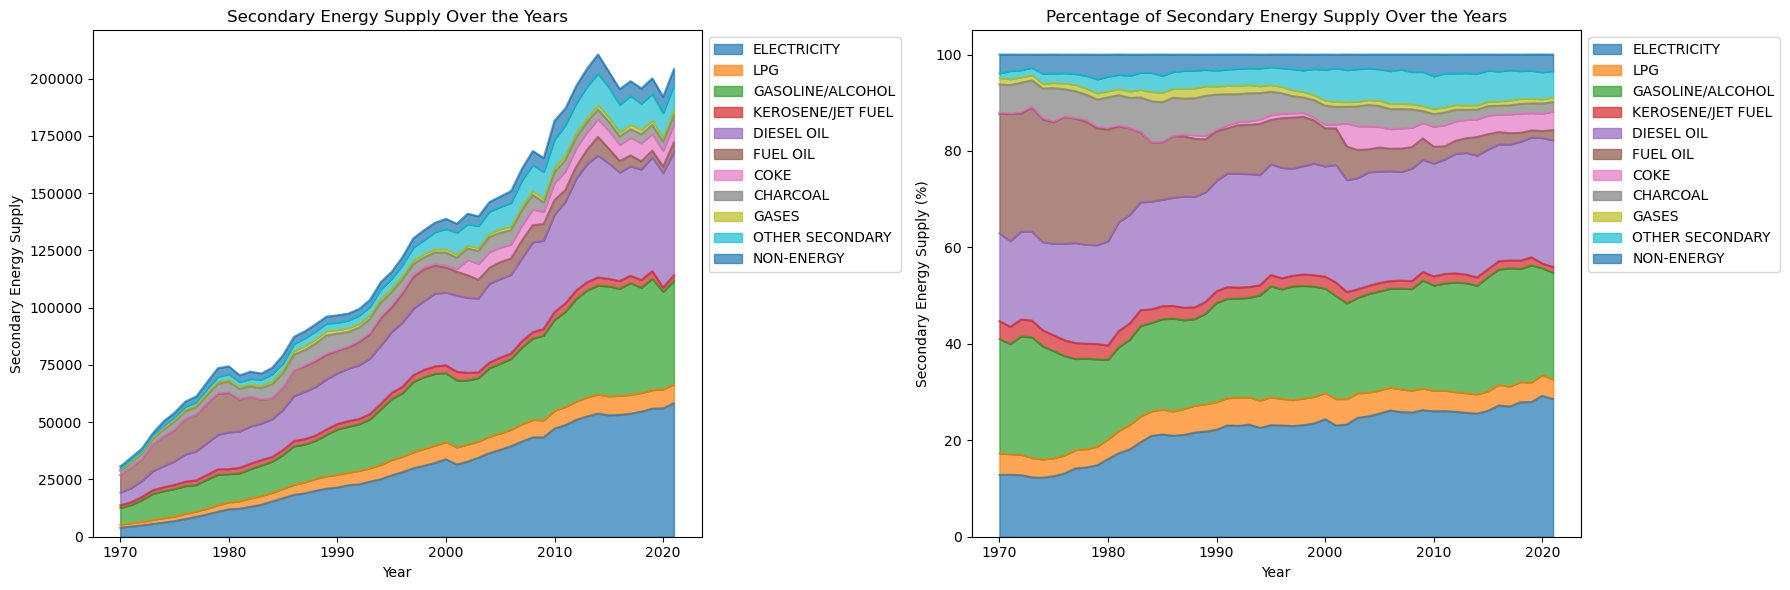

In [15]:
# Drop the 'TOTAL SECUNDARIES' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_TS2.drop(columns="TOTAL SECUNDARIES")
# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Secondary Energy Supply')
ax1.set_title('Secondary Energy Supply Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_TS2_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel('Secondary Energy Supply (%)')
ax2.set_title('Percentage of Secondary Energy Supply Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

## I.4 CONSUMPTION




**Antonio's notes:**

Pronosticar y analizar consumos energéticos:

 -Balance Eurostat
 
 -Balance España
 
Desagregar el consumo por destino

Evolución de los consumos:

 -Patrón
 
 -Correlaciones
 
 -Tipos de consumo
 
 -Relación entre Incremento económico (ciclos económicos de crecimiento)
 
                          Incremento consumo energético
                          
Análisis integrado con todos los consumos y ver si el abastecimiento, es decir, la oferta.

Validar los "nan" de cada fuente primaria de Brasil

Evaluar la industrialización de Brasil a futuro para ver como va a influir en su consumo

¿Es exportador de energía Brasil?

Pérdidas de energía eléctrica por distribución

Capacidad operativa de energía hidroeléctrica por las capacidades hídricas de los ríos


**Edu's notes:**

Entiendo que nos dice que hay que que ver la evolución del consumo en cuanto a los suministros

Relación oferta y demanda por segmentos en las series temporales

De esa forma también podriamos ver la correlación entre las variables (positivas/negativas) en estas series temporales que en Brasil han influido en la demanda/oferta en los diferentes segementos en las series temporales y así se veria la evolución

En cuanto a los escenarios, no se como plantearlos, se me ocurre algo pero necesito vuestra opinión:

Escenario con un aumento o disminución de la población lo que reflejaría un cambio en el consumo final energético.

Escenario con un aumento o disminución de la economía brasileña y su impacto en el consumo final energético.

Escenario de un desarrollo tecnológico que muestre su impacto en el consumo final energético

In [16]:
df_2021

,SECTOR,OIL,NATURAL GAS,COAL,HYDROENERGY,GEOTHERMAL,NUCLEAR,FIREWOOD,SUGARCANE AND PRODUCTS,OTHER PRIMARY,...,DIESEL OIL,FUEL OIL,COKE,CHARCOAL,GASES,OTHER SECONDARY,NON-ENERGY,TOTAL SECUNDARIES,TOTAL,Year
1,PRODUCTION,152713.43,26371.48,2633.08,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,41972.43,16109.25,6866.86,3915.43,2060.14,9109.18,5630.96,189790.51,320203.76,2021
2,IMPORT,7359.21,14796.23,13216.31,NaN,NaN,NaN,NaN,NaN,NaN,...,12211.92,581.74,1150.16,NaN,NaN,2901.18,1712.36,31674.9,67046.66,2021
3,EXPORT,65724.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,499.3,11963.08,NaN,NaN,NaN,841.83,385.76,17331.46,83055.53,2021
4,STOCK CHANGE,-1007.78,-3598.93,67.82,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.66,-431.71,-92.5,NaN,NaN,-25.31,-8.2,-35.62,-4574.51,2021
5,UNUSED,NaN,1217.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1217.87,2021
6,TOTAL SUPPLY,93340.78,36350.92,15917.21,31125.01,NaN,3835.75,26017.95,49469.74,28037.32,...,53662.39,4296.2,7924.52,3915.43,2060.14,11143.23,6949.36,204098.32,298402.5,2021
7,REFINERIES,-92551.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36249.21,16109.25,NaN,NaN,NaN,7528.3,4710.47,95389.98,2838.23,2021
8,POWER PLANTS,NaN,-13219.0,-4189.67,-29752.22,NaN,-3835.75,-56.11,NaN,-7138.42,...,-1371.21,-1656.49,NaN,NaN,NaN,-75.3,NaN,46508.5,-14785.66,2021
9,SELF-PRODUCERS,NaN,-4266.04,-215.78,-1372.79,NaN,NaN,-373.38,-5782.78,-5688.41,...,-561.98,-225.32,NaN,NaN,-394.47,-551.3,NaN,9776.97,-9655.28,2021
10,GAS PLANTS,NaN,-2583.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,920.49,2354.08,-229.54,2021


In [17]:
df_2021.SECTOR.unique()

array(['PRODUCTION', 'IMPORT', 'EXPORT', 'STOCK CHANGE', 'UNUSED',
       'TOTAL SUPPLY', 'REFINERIES', 'POWER PLANTS', 'SELF-PRODUCERS',
       'GAS PLANTS', 'CHARCOAL PLANTS',
       'COKE PLANTS AND BLAST FURNACES_x000d_', 'DISTILLERIES',
       'OTHER CENTERS', 'TOTAL TRANSFORMATION', 'OWN CONSUMPTION',
       'LOSSES', 'ADJUSTMENT', 'TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS', 'ENERGY CONSUMPTION',
       'NON-ENERGY CONSUMPTION', 'FINAL CONSUMPTION'], dtype=object)

In [18]:
Dict2=Dict.copy()

for k in Dict2.keys():
   # selected_columns = ['SECTOR', 'OIL', 'NATURAL GAS', 'COAL', 'HYDROENERGY', 'GEOTHERMAL',
    #   'NUCLEAR', 'FIREWOOD', 'SUGARCANE AND PRODUCTS', 'OTHER PRIMARY', 'TOTAL PRIMARIES','Year']
    selected_columns = ['SECTOR','TOTAL','Year']
    Dict2[k]=Dict2[k][selected_columns]
    selected_rows=['TRANSPORT', 'INDUSTRIAL', 'RESIDENTIAL',
       'COMMERCIAL, SERVICES, PUBLIC', 'AGRICULTURE, FISHING AND MINING',
       'CONSTRUCTION AND OTHERS',
       'NON-ENERGY CONSUMPTION','ENERGY CONSUMPTION', 'FINAL CONSUMPTION']
    Dict2[k]=Dict2[k][Dict2[k]['SECTOR'].isin(selected_rows)]
    
    # Concatenate all DataFrames in Dict vertically
    df_conc = pd.concat(Dict2.values(), ignore_index=True)
    
    # Move the column "Year" to the first position
    last_column_name = df_conc.columns[-1]
    # Reorder the columns by concatenating the last column with the rest of the DataFrame
    df_conc = pd.concat([df_conc[last_column_name], df_conc.drop(columns=last_column_name)], axis=1) # Datafames of TOTAL SUPPLY
    df_conc.set_index("Year", inplace=True)
    df_conc.index = df_conc.index.astype(int)
    #df_TC1=df_conc.drop(columns="SECTOR")
    # Set the value "NaN" by Zero
    df_TC1 = df_conc.apply(lambda column: column.fillna(0))
    
df_TC1.tail(10)

,SECTOR,TOTAL
Year,,
2020,FINAL CONSUMPTION,226959.77
2021,TRANSPORT,85176.10
2021,INDUSTRIAL,82389.66
2021,RESIDENTIAL,28421.75
2021,"COMMERCIAL, SERVICES, PUBLIC",12548.34
2021,"AGRICULTURE, FISHING AND MINING",15421.69
2021,CONSTRUCTION AND OTHERS,0.00
2021,ENERGY CONSUMPTION,223957.54
2021,NON-ENERGY CONSUMPTION,13236.97


In [19]:
# Group by Year and SECTOR, and sum the TOTAL values
grouped_df = df_TC1.groupby(['Year', 'SECTOR'])['TOTAL'].sum().reset_index()

grouped_df.tail(6)

# Pivot the data
pivot_df = grouped_df.pivot(index='Year', columns='SECTOR', values='TOTAL')


# Display the result
pivot_df.tail()



SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,ENERGY CONSUMPTION,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,,,
2017,14947.62,12453.69,0.0,217970.64,233004.63,82334.45,15033.99,25356.57,82878.31
2018,15092.95,12678.81,0.0,214547.45,228665.38,78167.81,14117.93,26377.98,82229.91
2019,15123.66,13113.50,0.0,216058.03,230298.05,76310.71,14240.02,26589.02,84921.14
2020,15168.99,12027.15,0.0,214403.72,226959.77,79593.61,12556.05,28199.70,79414.26
2021,15421.69,12548.34,0.0,223957.54,237194.52,82389.66,13236.97,28421.75,85176.10


In [20]:
# Dataframe Energy Consumption (EC)
df_EC=pivot_df.drop(columns=['ENERGY CONSUMPTION'])
df_EC.head()

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,,
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68


In [21]:
# Drop the 'FINAL CONSUMPTION' column and calculate the percentages
df_percentages = (df_EC.drop(columns=['FINAL CONSUMPTION']).div(df_EC['FINAL CONSUMPTION'], axis=0) * 100)
df_percentages = df_percentages.round(0)

df_percentages.tail(20)

SECTOR,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT
Year,,,,,,,
2002,5.0,5.0,0.0,41.0,5.0,13.0,31.0
2003,5.0,5.0,0.0,42.0,5.0,13.0,29.0
2004,6.0,5.0,0.0,41.0,5.0,13.0,30.0
2005,7.0,5.0,0.0,41.0,5.0,13.0,30.0
2006,6.0,5.0,0.0,41.0,5.0,12.0,30.0
2007,7.0,5.0,0.0,41.0,5.0,12.0,30.0
2008,7.0,5.0,0.0,40.0,4.0,12.0,32.0
2009,6.0,5.0,0.0,39.0,5.0,12.0,33.0
2010,6.0,5.0,0.0,40.0,5.0,11.0,33.0


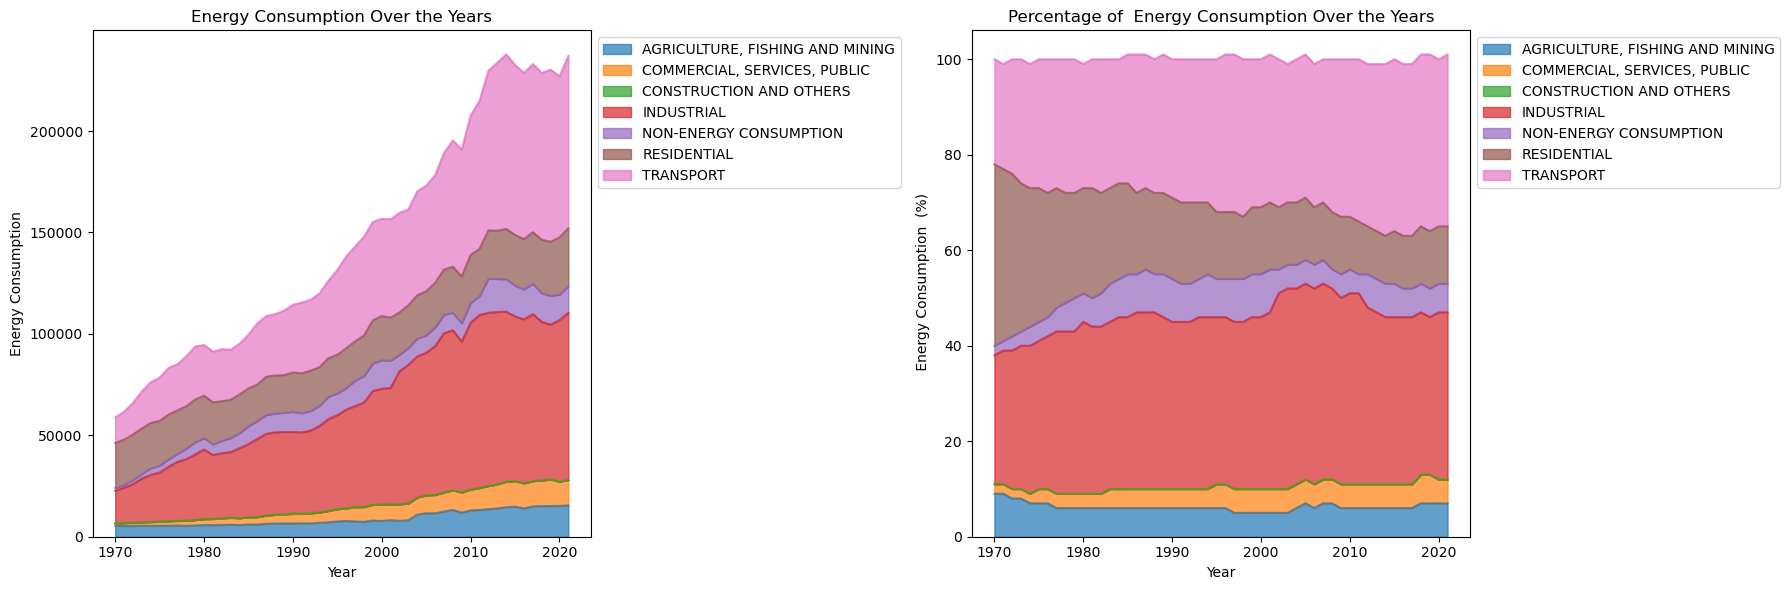

In [22]:
# Drop the 'FINAL CONSUMPTION' column (if not already dropped) as it is not needed for the stack plot
df_stackplot = df_EC.drop(columns=["FINAL CONSUMPTION"])

# Plot both stack plots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))


df_stackplot.plot.area(stacked=True, alpha=0.7, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

df_percentages.plot.area(stacked=True, alpha=0.7, ax=ax2)

ax2.set_xlabel('Year')
ax2.set_ylabel(' Energy Consumption  (%)')
ax2.set_title('Percentage of  Energy Consumption Over the Years')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

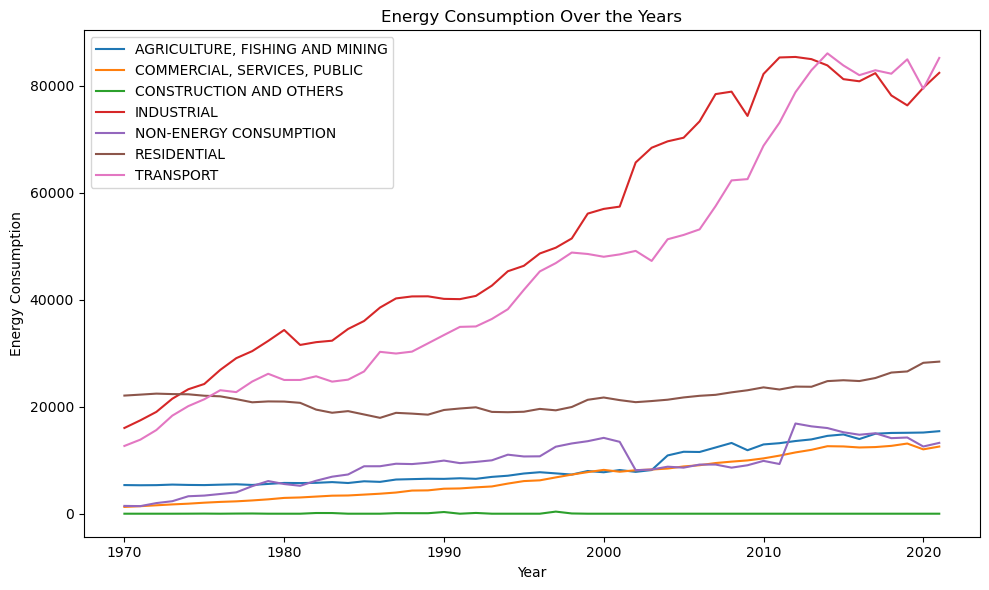

In [23]:
data=df_stackplot.copy()

# Line_Plot:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

data.plot(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Energy Consumption')
ax1.set_title('Energy Consumption Over the Years')
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

### CORRELATION MATRIX

In [24]:

list_correlacion=data.columns

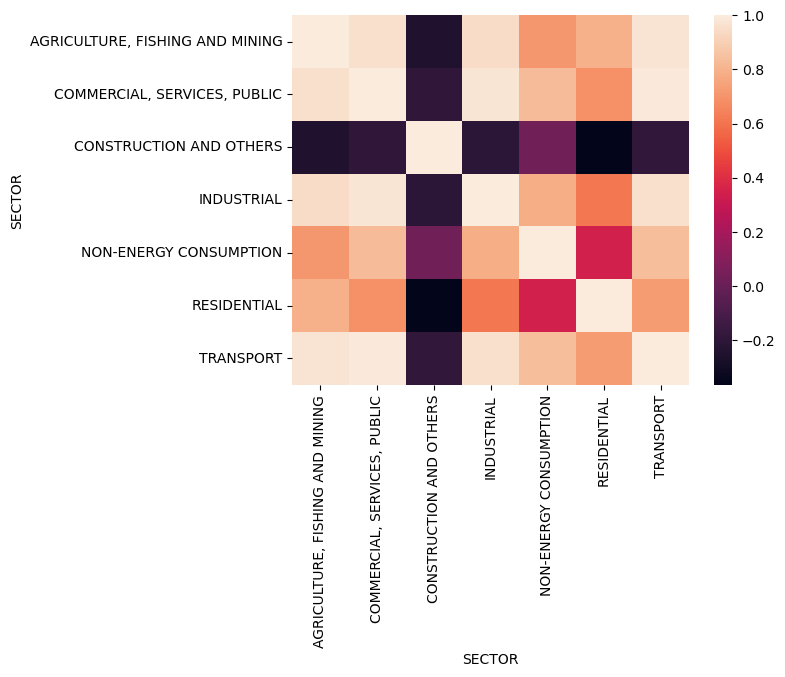

In [25]:
df_correlacion = data[list_correlacion]
correlation_mat = df_correlacion.corr()
sns.heatmap(correlation_mat)
plt.show()

AGRICULTURE, FISHING AND MINING


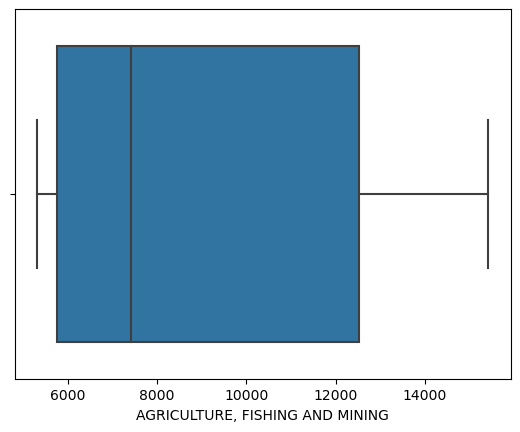

COMMERCIAL, SERVICES, PUBLIC


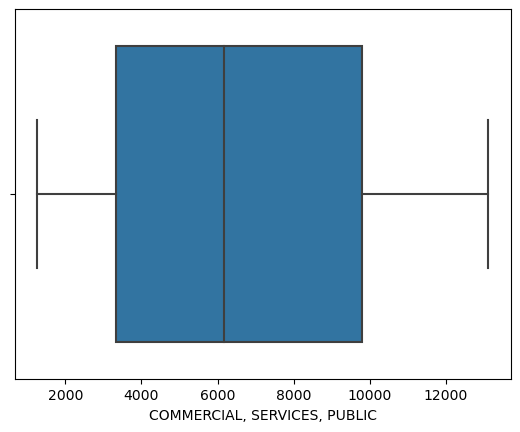

CONSTRUCTION AND OTHERS


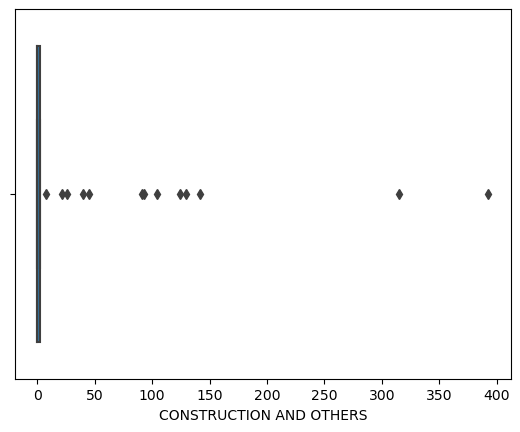

INDUSTRIAL


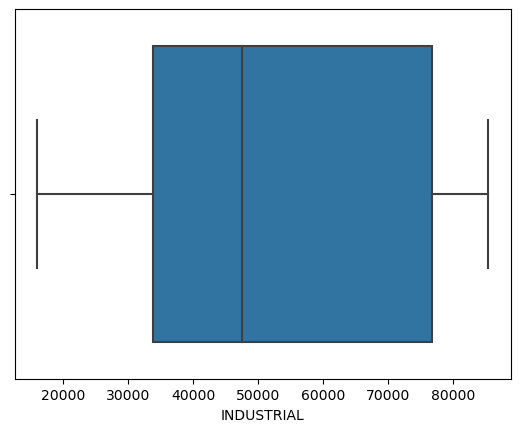

NON-ENERGY CONSUMPTION


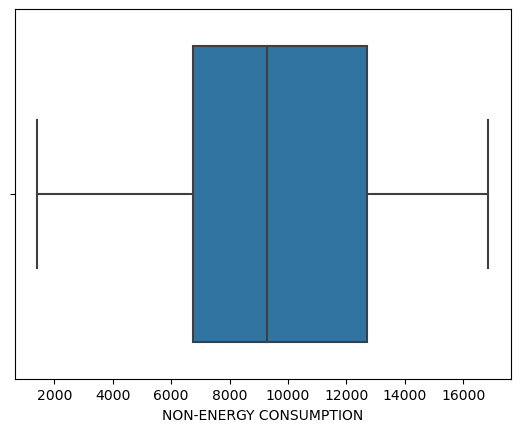

RESIDENTIAL


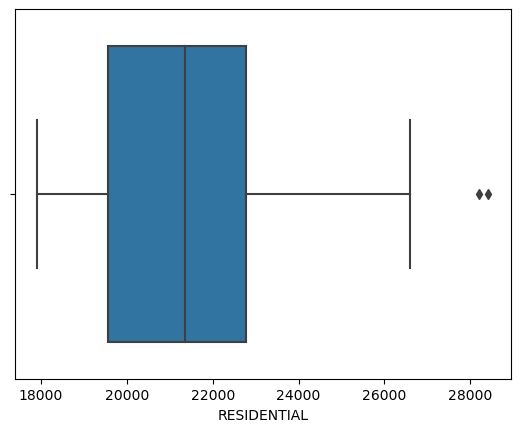

TRANSPORT


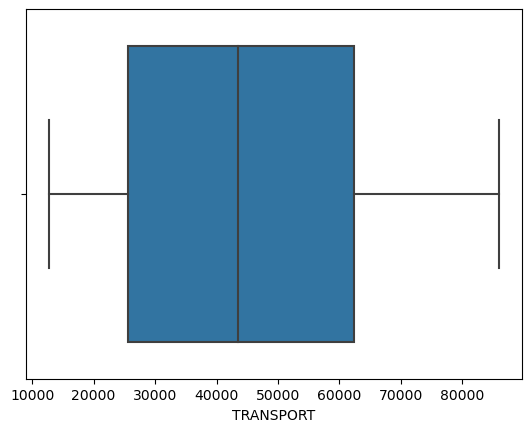

In [26]:
for i in list_correlacion:
    sns.boxplot(x=data[i])
    print(i)
    plt.show()

In [27]:
def saca_metricas(y_real, y_pred): 
    false_positive_rate, recall, thresholds = roc_curve(y_real, y_pred)
    roc_auc = auc(false_positive_rate, recall)
    print('- AUC: {roc_auc}')
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)

In [28]:
#models_rcv = {
 #   "XGB": XGBClassifier(n_jobs=-1, n_estimators=30, random_state=1234),
  #  "RF": RandomForestClassifier(n_estimators =30, n_jobs=-1, random_state=1234),
  #  "Tree": DecisionTreeClassifier(random_state=1234),
  #  "Log": LogisticRegression(solver="newton-cg", penalty="l2"),
#}

def rskf_comparison(models, X_train, y_train):
    
    results = []
    names = []

    for k, v in models.items():
    
        rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234) 
        cv_scores = cross_val_score(v, X_train, y_train, scoring='roc_auc', cv=rskf, n_jobs=-1)

        results.append(cv_scores)
        names.append(k)

        print(k)
        print('CV AUC: %.5f +/- %.5f' % (np.mean(cv_scores), np.std(cv_scores)))
        print('-------------------------')
        
    
    return(results, names)


#results, names = rskf_comparison(models_rcv, X_train, y_train)
#plt.figure(figsize=(10, 6))
#comparison = plt.boxplot(results)
#plt.xticks(np.arange(1,len(names)+1),names)
#plt.show(comparison)

In [29]:
#grid_param = {
#    'n_estimators': [100,300,500],
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [16,20,22,24],
#    'max_features': ['auto', 'sqrt'],

#}

When dealing with time series prediction problems, some **suitable models** are :

Autoregressive Integrated Moving Average (ARIMA)

Seasonal Autoregressive Integrated Moving-Average (SARIMA):

Seasonal Decomposition of Time Series (STL)

Exponential Smoothing (ETS)

Long Short-Term Memory (LSTM)

Gated Recurrent Units (GRU)

Convolutional Neural Networks (CNNs)

**Here's a high-level outline of how you might approach creating such a pipeline:**

### 1. Data Preparation:

Load and preprocess your time series data.
Convert the target variable to numerical values if needed.
### 2. Model Selection:

Define a list of time series forecasting models you want to consider (ARIMA, SARIMA, STL, ETS, LSTM, GRU, CNNs).
Define hyperparameters for each model, if applicable.

### 3. Pipeline Creation:

For each model in the list, create a separate pipeline that includes data preprocessing, model fitting, and prediction.

### 4.Model Evaluation:

Use appropriate time series evaluation metrics (e.g., Mean Squared Error, Root Mean Squared Error, Mean Absolute Error) to evaluate the performance of each model on a validation set.

### 5. Model Selection:

Compare the performance metrics of each model to identify the best-performing model.
Select the model with the lowest error or the best fit for your problem.

### 6. Fine-Tuning and Validation:

If needed, perform hyperparameter tuning on the selected model using techniques like grid search or random search.
Validate the tuned model on a separate test set to ensure its generalization performance.

### 7. Final Model and Deployment:

Once you have identified the best model, train it on the entire dataset (including training and validation data).
Deploy the final model for making predictions on new data.

### 1. Data Preparation:

In [30]:
#Load data of economy
economic_demographic_data = pd.read_excel('../datas/Brasil_indices.xlsx', index_col='Year')

cols=economic_demographic_data.columns
print(cols)

Index(['Población', 'PIB', 'Crecimiento población anual', 'Tasa de natalidad',
       'Tasa inflacion', 'Tasas de muerte/1000 personas',
       'Consumo per capita energetico', 'tasa de crecimiento', 'Peso Petróleo',
       'Peso Natural gas', 'Peso Coal', 'Peso Hydroenergy', 'Nuclear',
       'Firewood', 'Sugarcane and products', 'Otros', 'TOTAL',
       ' Penet_energ_renovable', 'Huella_carbono'],
      dtype='object')


In [31]:
selected_cols=cols[:6]

In [32]:
df1=economic_demographic_data[selected_cols]

In [33]:
data=df_EC
#Merge data
merged_df = data.merge(df1, left_index=True, right_index=True)

# Convertir el índice a tipo entero 
merged_df.index = merged_df.index.astype(int)
# Imprimir el DataFrame unido para verificar
merged_df.columns

Index(['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC',
       'CONSTRUCTION AND OTHERS', 'FINAL CONSUMPTION', 'INDUSTRIAL',
       'NON-ENERGY CONSUMPTION', 'RESIDENTIAL', 'TRANSPORT', 'Población',
       'PIB', 'Crecimiento población anual', 'Tasa de natalidad',
       'Tasa inflacion', 'Tasas de muerte/1000 personas'],
      dtype='object')

In [34]:
#Convert cols to English
merged_df.rename(columns={'Población':'POPULATION','PIB': 'GDP',
                          'Crecimiento población anual': 'ANNUAL POPULATION GROWTH',
                          'Tasa de natalidad': 'BIRTH RATE',
                          'Tasa inflacion': 'INFLATION RATE',
                          'Tasas de muerte/1000 personas': 'DEATH RATES PER 1000 PEOPLE'}, inplace=True)

In [35]:
merged_df.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,INFLATION RATE,DEATH RATES PER 1000 PEOPLE
Year,,,,,,,,,,,,,,
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99,96369875,4.232766e+10,0.025207,4.972,24.75,10.820
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87,98766288,4.886983e+10,0.024867,4.857,15.55,10.595
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22,101194394,5.843486e+10,0.024584,4.746,18.97,10.367
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90,103666904,8.359228e+10,0.024433,4.646,15.24,10.157
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68,106167372,1.097945e+11,0.024120,4.502,34.52,9.954


In [36]:
SECTORS=['AGRICULTURE, FISHING AND MINING', 'COMMERCIAL, SERVICES, PUBLIC', 'INDUSTRIAL', 'NON-ENERGY CONSUMPTION',
       'RESIDENTIAL', 'TRANSPORT']

In [37]:
FEATURES=['POPULATION',
       'GDP', 'ANNUAL POPULATION GROWTH', 'BIRTH RATE', 'INFLATION RATE',
       'DEATH RATES PER 1000 PEOPLE']


missing_values=merged_df.isnull().sum()
missing_values

AGRICULTURE, FISHING AND MINING    0
COMMERCIAL, SERVICES, PUBLIC       0
CONSTRUCTION AND OTHERS            0
FINAL CONSUMPTION                  0
INDUSTRIAL                         0
NON-ENERGY CONSUMPTION             0
RESIDENTIAL                        0
TRANSPORT                          0
POPULATION                         0
GDP                                0
ANNUAL POPULATION GROWTH           0
BIRTH RATE                         0
INFLATION RATE                     0
DEATH RATES PER 1000 PEOPLE        0
dtype: int64

## StandardScaler
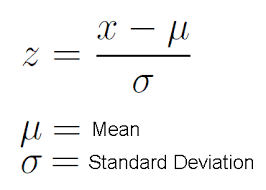


In [136]:
merged_df.head()

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,INFLATION RATE,DEATH RATES PER 1000 PEOPLE
Year,,,,,,,,,,,,,,
1970,5351.01,1266.80,0.00,58834.12,16020.92,1457.73,22075.66,12661.99,96369875,4.232766e+10,0.025207,4.972,24.75,10.820
1971,5317.39,1406.98,0.00,61691.69,17454.73,1416.75,22253.96,13841.87,98766288,4.886983e+10,0.024867,4.857,15.55,10.595
1972,5338.47,1570.69,0.00,65995.12,19026.99,1984.88,22440.87,15633.22,101194394,5.843486e+10,0.024584,4.746,18.97,10.367
1973,5441.91,1737.84,0.00,71692.86,21493.43,2336.65,22354.13,18328.90,103666904,8.359228e+10,0.024433,4.646,15.24,10.157
1974,5376.38,1873.46,7.15,76198.40,23257.01,3262.03,22316.70,20105.68,106167372,1.097945e+11,0.024120,4.502,34.52,9.954


In [143]:
merged_df.index

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='Year')

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df)
scaled_df = pd.DataFrame(scaled_data, columns=merged_df.columns)
scaled_df.set_index(merged_df.index, inplace=True)

In [147]:
scaled_df

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,INFLATION RATE,DEATH RATES PER 1000 PEOPLE
Year,,,,,,,,,,,,,,
1970,-0.985778,-1.430541,-0.392297,-1.521266,-1.648308,-1.944124,0.153995,-1.461818,-1.792600,-1.053334,1.476455,2.042239,-0.357554,2.431155
1971,-0.995155,-1.393529,-0.392297,-1.470883,-1.583779,-1.954237,0.226010,-1.409832,-1.726211,-1.044875,1.421887,1.932489,-0.373344,2.269055
1972,-0.989276,-1.350306,-0.392297,-1.395007,-1.513020,-1.814033,0.301502,-1.330903,-1.658943,-1.032507,1.376614,1.826556,-0.367474,2.104793
1973,-0.960427,-1.306174,-0.392297,-1.294547,-1.402017,-1.727223,0.266468,-1.212129,-1.590446,-0.999978,1.352398,1.731121,-0.373876,1.953500
1974,-0.978703,-1.270366,-0.297072,-1.215107,-1.322647,-1.498858,0.251350,-1.133843,-1.521173,-0.966098,1.302222,1.593694,-0.340785,1.807249
1975,-0.986417,-1.221376,-0.106754,-1.174670,-1.278281,-1.468094,0.143134,-1.077501,-1.450996,-0.941002,1.260499,1.510665,-0.348835,1.655956
1976,-0.964613,-1.182723,-0.392297,-1.091500,-1.159670,-1.394825,0.097918,-1.002884,-1.379355,-0.910014,1.249301,1.438135,-0.368761,1.529158
1977,-0.943978,-1.155053,-0.043225,-1.059454,-1.061271,-1.319821,-0.113514,-1.018494,-1.305846,-0.880048,1.257759,1.369421,-0.388413,1.402360
1978,-0.979704,-1.110358,0.136571,-0.990366,-1.001965,-1.033553,-0.352997,-0.931300,-1.230367,-0.849100,1.268801,1.300708,-0.388155,1.266195


In [148]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten


# Assuming you have a DataFrame named df with a target column
target='FINAL CONSUMPTION'


# Split data into train and test sets 
train_size = int(len(merged_df) * 0.80)
# data without scaling
#train, test = merged_df.iloc[:train_size], merged_df.iloc[train_size:]

#data scaling:
train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]


#X_train = train[FEATURES].values.reshape((-1, len(FEATURES), 1))
#X_test = test[FEATURES].values.reshape((-1, len(FEATURES), 1))

X_train = train[FEATURES]
X_test = test[FEATURES]
y_train=train[target]   
y_test=test[target]

combined_index = np.concatenate((train.index.values, test.index.values), axis=0)
combined_index
train

,"AGRICULTURE, FISHING AND MINING","COMMERCIAL, SERVICES, PUBLIC",CONSTRUCTION AND OTHERS,FINAL CONSUMPTION,INDUSTRIAL,NON-ENERGY CONSUMPTION,RESIDENTIAL,TRANSPORT,POPULATION,GDP,ANNUAL POPULATION GROWTH,BIRTH RATE,INFLATION RATE,DEATH RATES PER 1000 PEOPLE
Year,,,,,,,,,,,,,,
1970,-0.985778,-1.430541,-0.392297,-1.521266,-1.648308,-1.944124,0.153995,-1.461818,-1.792600,-1.053334,1.476455,2.042239,-0.357554,2.431155
1971,-0.995155,-1.393529,-0.392297,-1.470883,-1.583779,-1.954237,0.226010,-1.409832,-1.726211,-1.044875,1.421887,1.932489,-0.373344,2.269055
1972,-0.989276,-1.350306,-0.392297,-1.395007,-1.513020,-1.814033,0.301502,-1.330903,-1.658943,-1.032507,1.376614,1.826556,-0.367474,2.104793
1973,-0.960427,-1.306174,-0.392297,-1.294547,-1.402017,-1.727223,0.266468,-1.212129,-1.590446,-0.999978,1.352398,1.731121,-0.373876,1.953500
1974,-0.978703,-1.270366,-0.297072,-1.215107,-1.322647,-1.498858,0.251350,-1.133843,-1.521173,-0.966098,1.302222,1.593694,-0.340785,1.807249
1975,-0.986417,-1.221376,-0.106754,-1.174670,-1.278281,-1.468094,0.143134,-1.077501,-1.450996,-0.941002,1.260499,1.510665,-0.348835,1.655956
1976,-0.964613,-1.182723,-0.392297,-1.091500,-1.159670,-1.394825,0.097918,-1.002884,-1.379355,-0.910014,1.249301,1.438135,-0.368761,1.529158
1977,-0.943978,-1.155053,-0.043225,-1.059454,-1.061271,-1.319821,-0.113514,-1.018494,-1.305846,-0.880048,1.257759,1.369421,-0.388413,1.402360
1978,-0.979704,-1.110358,0.136571,-0.990366,-1.001965,-1.033553,-0.352997,-0.931300,-1.230367,-0.849100,1.268801,1.300708,-0.388155,1.266195


In [153]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def Execute_model(model_name,test,train, X_train, X_test, y_train, y_test, FEATURES, target):
    if model_name in ["ARIMA","SARIMA", "ETS"]:
        # Initialize the model with appropriate parameters
        if model_name == "ARIMA":
            model = ARIMA(endog=y_train, order=(5, 1, 0))
        
        if model_name == "SARIMA":
            model = SARIMAX(endog=y_train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
        elif model_name == "ETS":
            model = ExponentialSmoothing(endog=y_train, seasonal='add', seasonal_periods=12)
            
        # Fit the model
        fit_model = model.fit()
        y_pred = fit_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

    if model_name in ["LSTM", "GRU", "TENSORFLOW"]:
        # Create and compile the deep learning models
        model = Sequential()

        if model_name == "LSTM":
            model.add(LSTM(50, input_shape=(len(FEATURES), 1)))
            model.add(Dense(1))
        elif model_name == "GRU":
            model.add(GRU(50, input_shape=(len(FEATURES), 1)))
            model.add(Dense(1))
        elif model_name == "TENSORFLOW":
            model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
            model.add(Dropout(0.5))  # Agregar dropout para evitar overfitting
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='linear'))
        #elif model_name == "CNN":
         #   model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(len(FEATURES), 1)))
          #  model.add(MaxPooling1D(pool_size=2))
           # model.add(Flatten())

        
        model.compile(optimizer='adam', loss='mse')

        # Convert data types to float64
        X_train = X_train.values.astype('float64')
        X_test = X_test.values.astype('float64')

        # Reshape input data for deep learning models
        X_train = X_train.reshape((-1, len(FEATURES), 1))
        X_test = X_test.reshape((-1, len(FEATURES), 1))

        # Ensure y_train and y_test are float64
        y_train = y_train.astype('float64')
        y_test = y_test.astype('float64')

        # Fit the model
        model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

        # Make predictions
        y_pred = model.predict(X_test).flatten()

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate R-squared (Coefficient of Determination)
    r2 = r2_score(y_test, y_pred)
    # Define the Plot function within Execute_model
    def Plot(train=train, test=test,X_test=X_test, y_test=y_test, y_pred=y_pred):
        combined_index = np.concatenate((train.index, test.index), axis=0)
        combined_y_pred = np.concatenate((y_train, y_pred), axis=0)
        combined_y_test = np.concatenate((y_train, y_test), axis=0)
        

        plt.figure(figsize=(10, 6))
        
        plt.plot(combined_index, combined_y_pred, label='Predicted')
        plt.plot(combined_index, combined_y_test, label='Actual')
        plt.title(f'Actual and Predicted data of model {model_name} with mse={mse:.2f}, R-squared={r2:.2f}')
        plt.xlabel("Year")
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
        plt.show()
 
    # Call the Plot function
    #Plot(X_test, y_test, y_pred)

  
    results={"model_name":model_name, "mse":mse, "y_pred":y_pred, "R-squared": r2, "Plot": Plot()}
    
    return results





/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


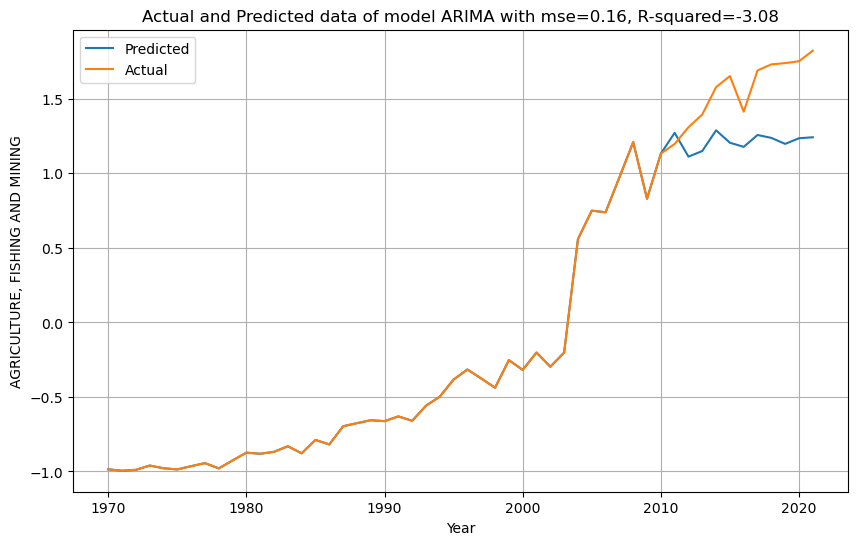

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.82432D-01    |proj g|=  5.09381D-01

At iterate    5    f= -1.88340D-01    |proj g|=  1.47109D-01

At iterate   10    f= -1.89106D-01    |proj g|=  1.47295D-02

At iterate   15    f= -1.89138D-01    |proj g|=  3.39096D-03

At iterate   20    f= -1.89149D-01    |proj g|=  4.08797D-03

At iterate   25    f= -1.89698D-01    |proj g|=  1.30128D-02

At iterate   30    f= -1.90021D-01    |proj g|=  1.65650D-02

At iterate   35    f= -1.90053D-01    |proj g|=  7.16889D-03

At iterate   40    f= -1.90064D-01    |proj g|=  2.86994D-03

At iterate   45    f= -1.90099D-01    |proj g|=  2.95689D-03

At iterate   50    f= -1.90144D-01    |proj g|=  4.19750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


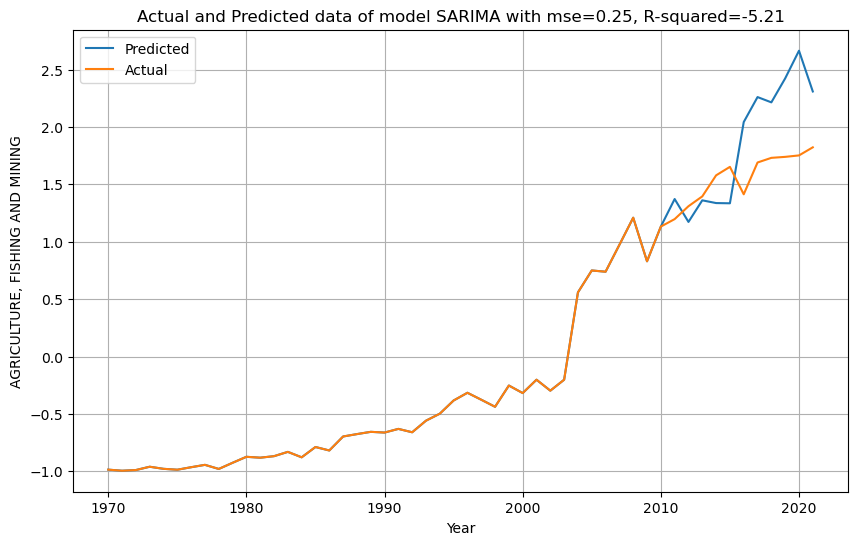

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


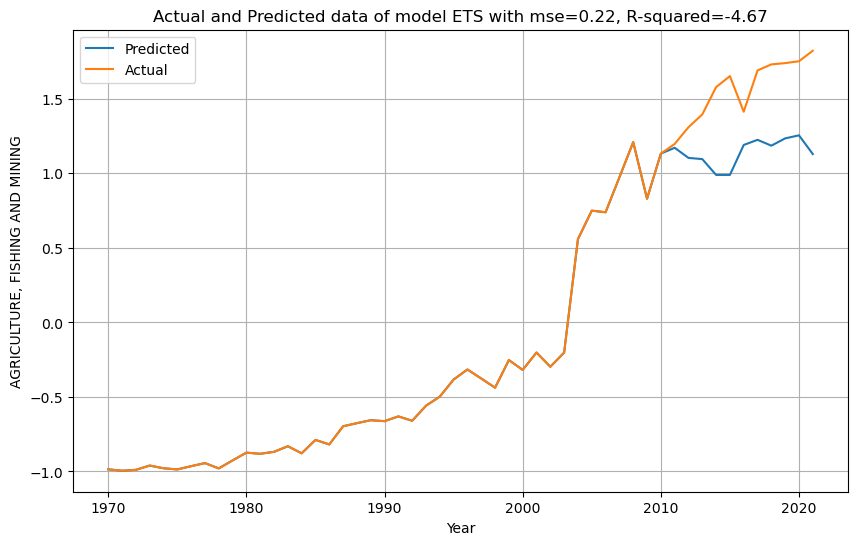

1/1 [==============================] - 0s 303ms/step


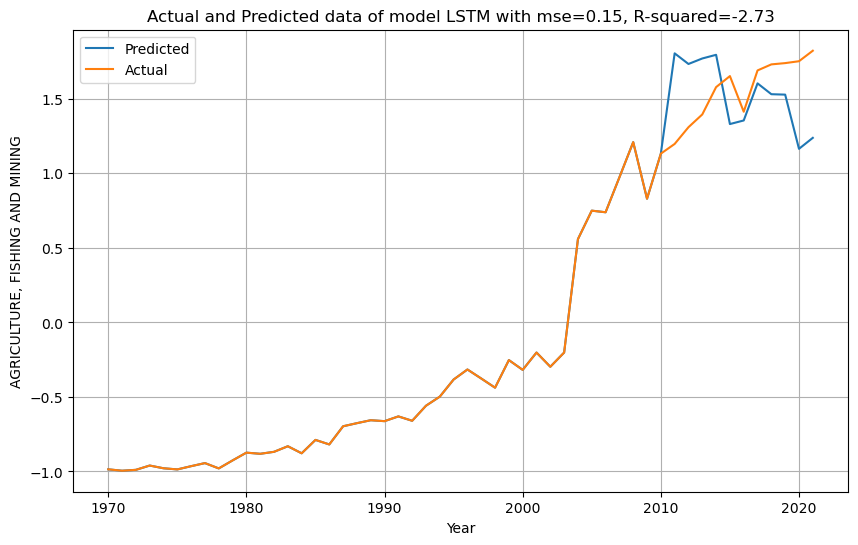

1/1 [==============================] - 0s 269ms/step


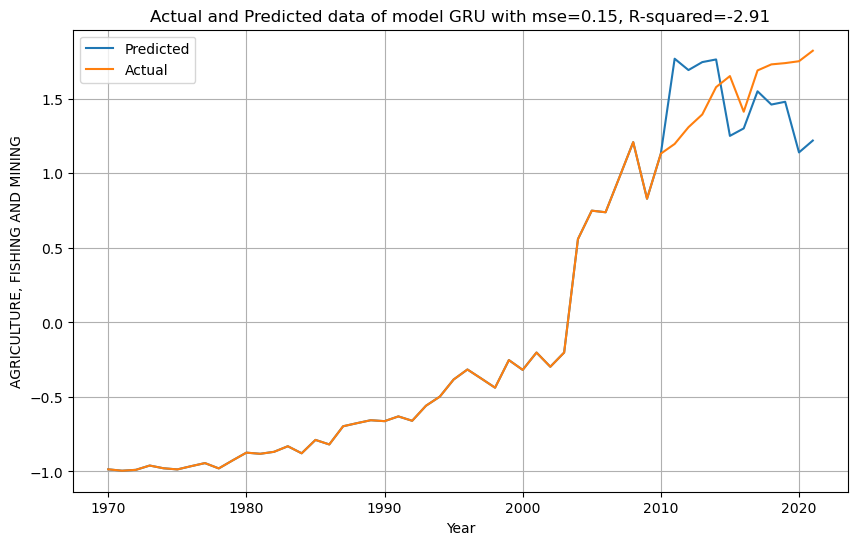

1/1 [==============================] - 0s 44ms/step


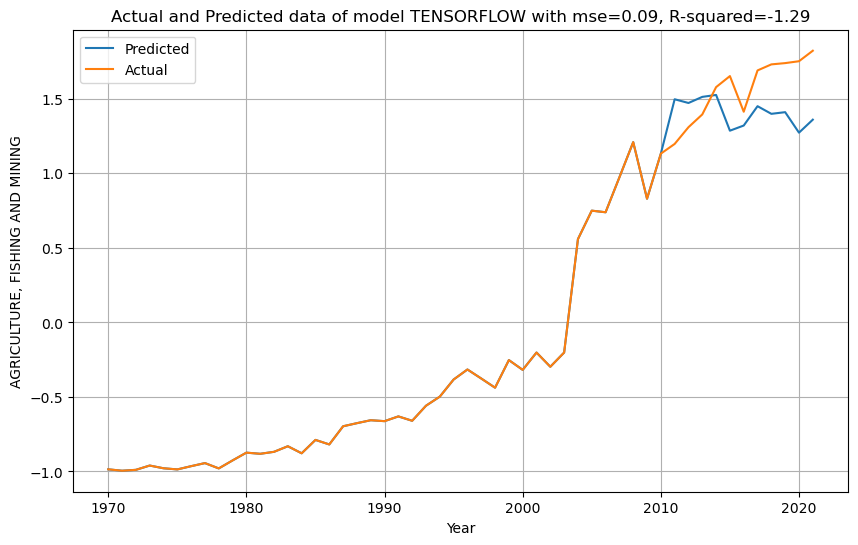

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


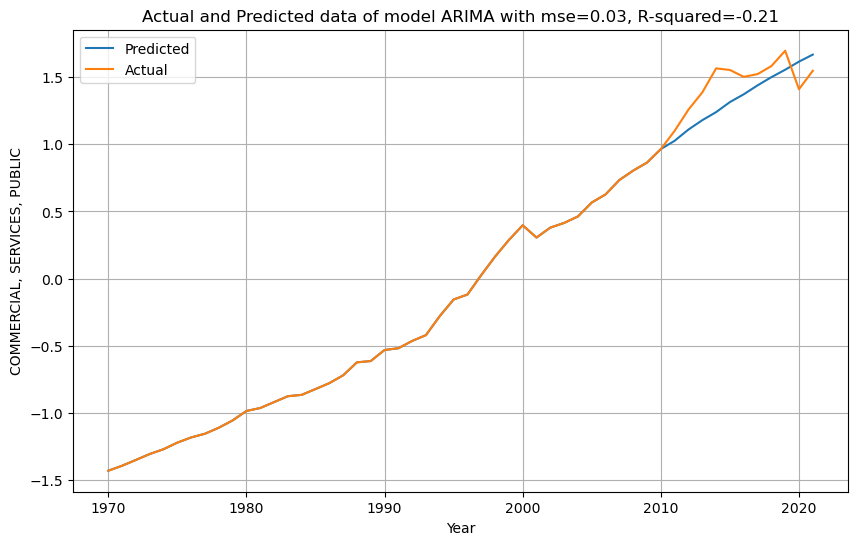

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09768D+00    |proj g|=  2.12365D+00

At iterate    5    f= -1.10770D+00    |proj g|=  1.97800D+00

At iterate   10    f= -1.14124D+00    |proj g|=  9.75790D-02

At iterate   15    f= -1.14159D+00    |proj g|=  3.27481D-01

At iterate   20    f= -1.14220D+00    |proj g|=  1.26292D-02

At iterate   25    f= -1.14256D+00    |proj g|=  2.67806D-02

At iterate   30    f= -1.14370D+00    |proj g|=  1.60384D-01

At iterate   35    f= -1.14608D+00    |proj g|=  1.27512D-01

At iterate   40    f= -1.14767D+00    |proj g|=  9.88305D-02

At iterate   45    f= -1.14794D+00    |proj g|=  5.27332D-02

At iterate   50    f= -1.14899D+00    |proj g|=  1.48626D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


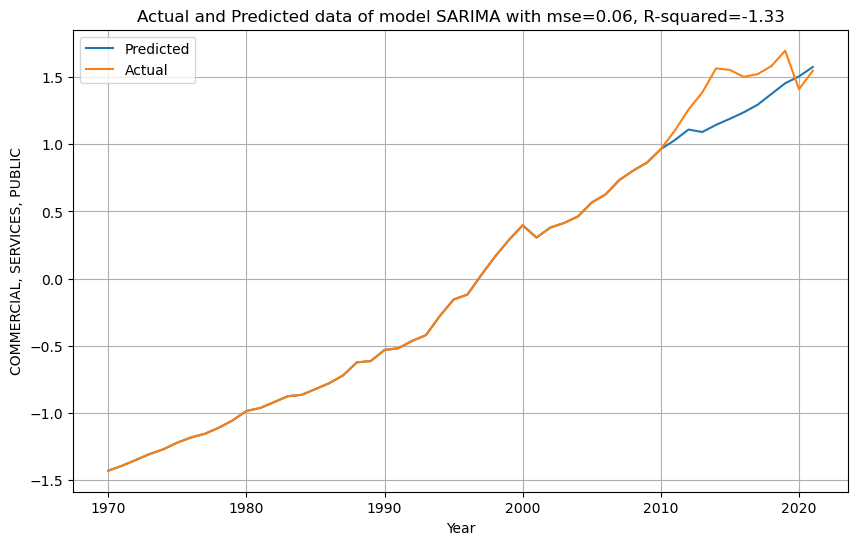

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


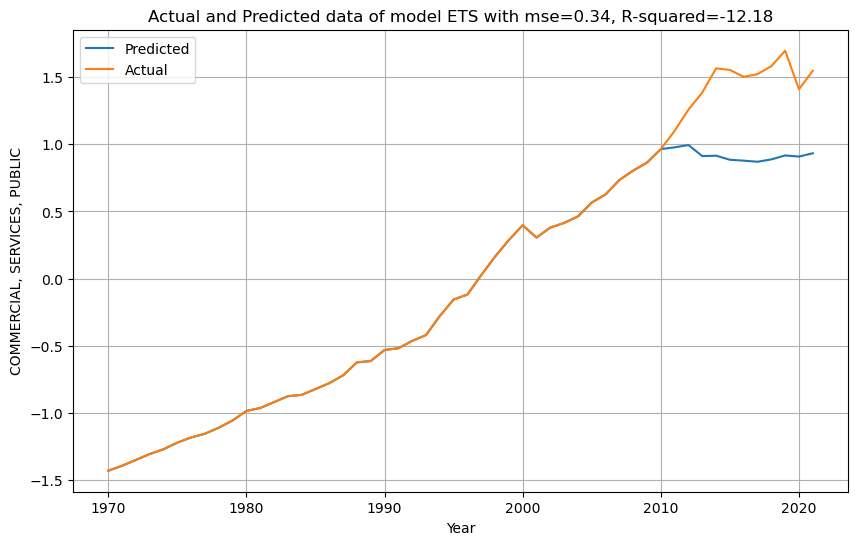

1/1 [==============================] - 0s 297ms/step


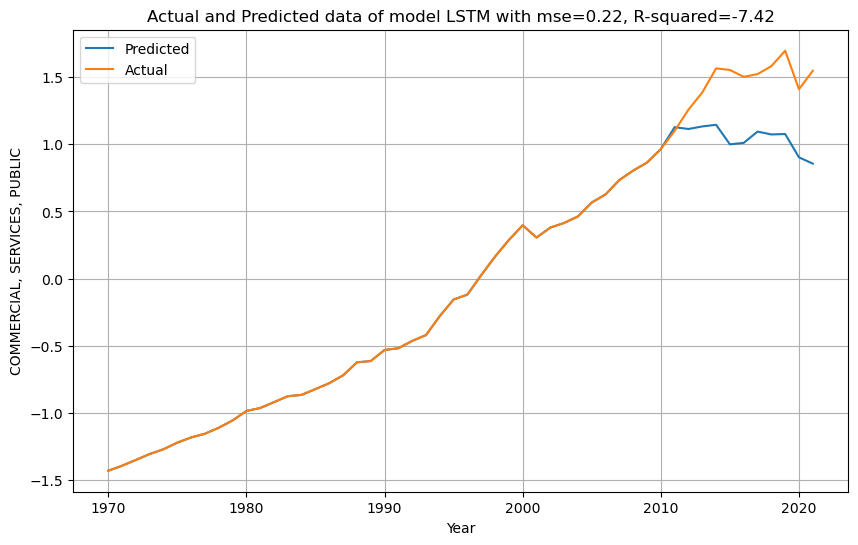

1/1 [==============================] - 0s 291ms/step


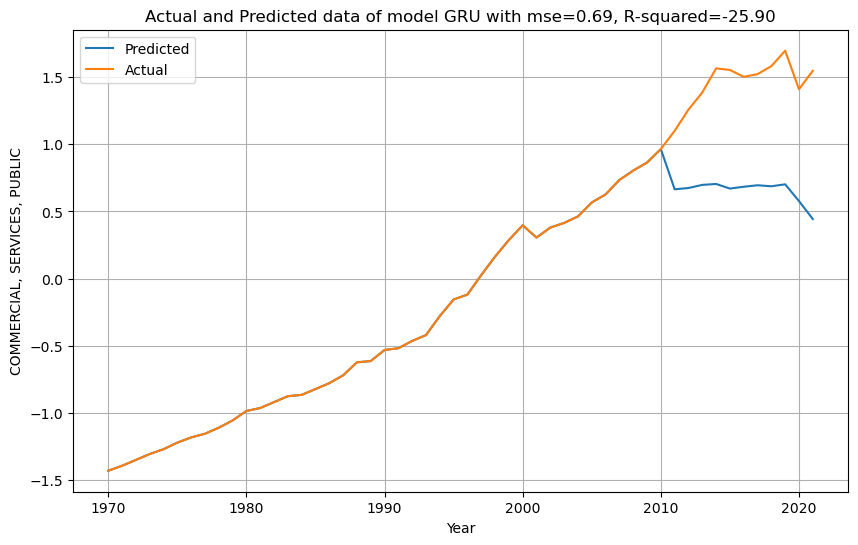

1/1 [==============================] - 0s 53ms/step


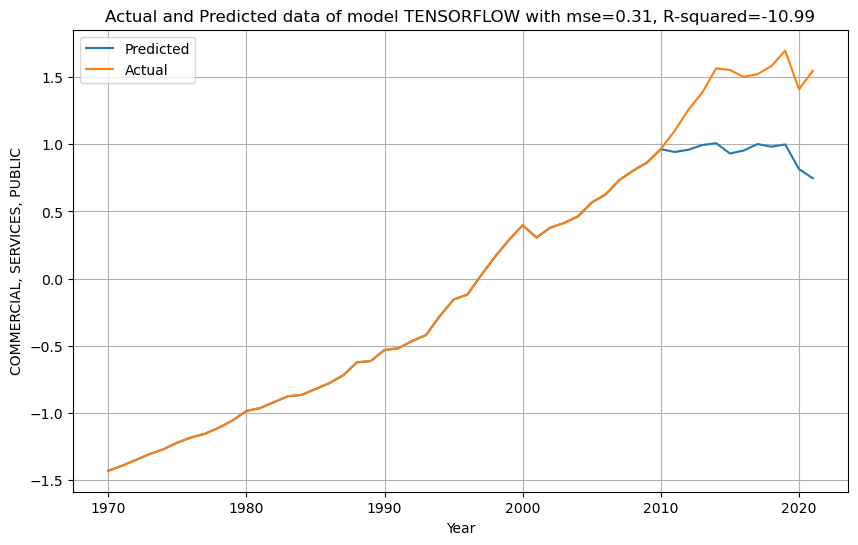

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


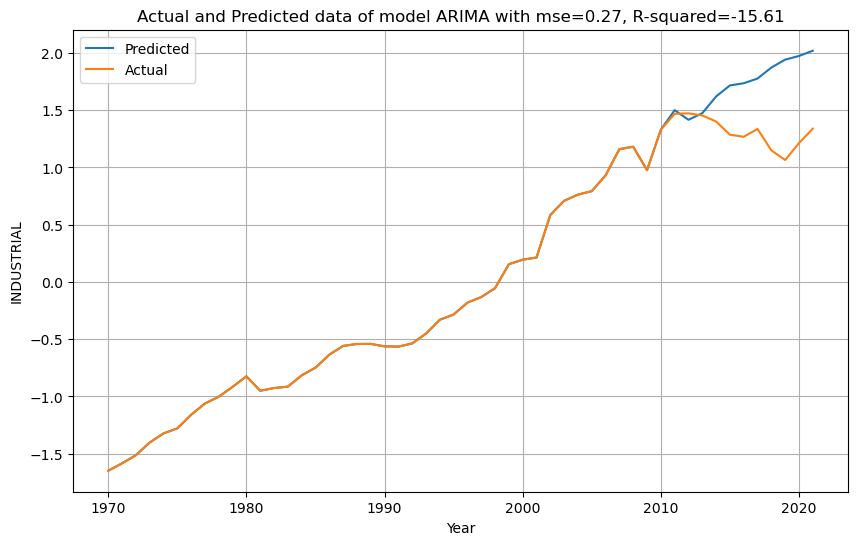

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.55942D-01    |proj g|=  8.03049D-01

At iterate    5    f= -4.78527D-01    |proj g|=  1.09422D+00

At iterate   10    f= -4.90273D-01    |proj g|=  3.41154D-01

At iterate   15    f= -5.01889D-01    |proj g|=  5.52256D-02

At iterate   20    f= -5.04377D-01    |proj g|=  5.32505D-02

At iterate   25    f= -5.07958D-01    |proj g|=  1.65788D-01

At iterate   30    f= -5.13161D-01    |proj g|=  1.41578D-01

At iterate   35    f= -5.13824D-01    |proj g|=  9.80728D-03

At iterate   40    f= -5.13994D-01    |proj g|=  6.48698D-03

At iterate   45    f= -5.14120D-01    |proj g|=  4.65998D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


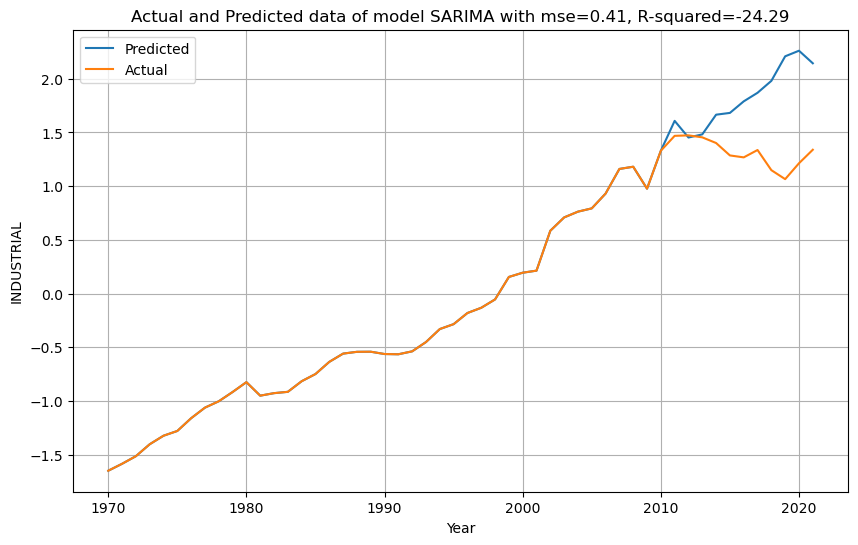

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


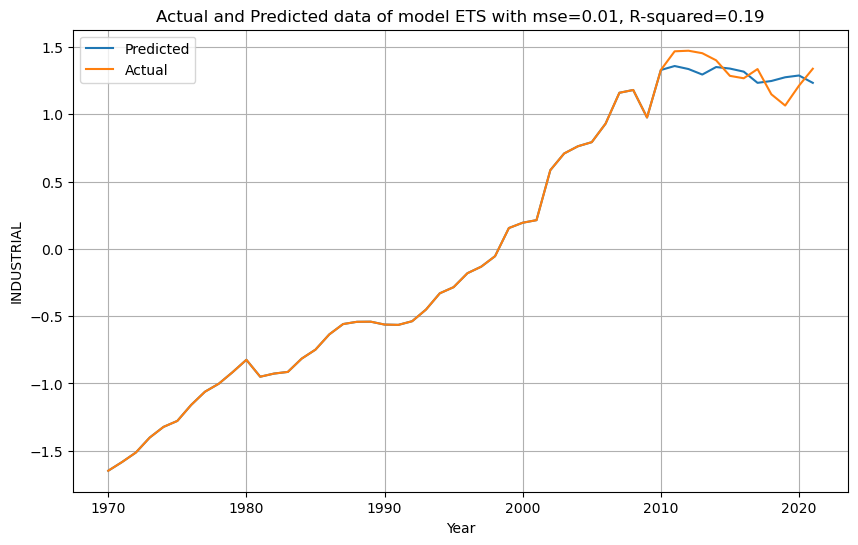

1/1 [==============================] - 0s 305ms/step


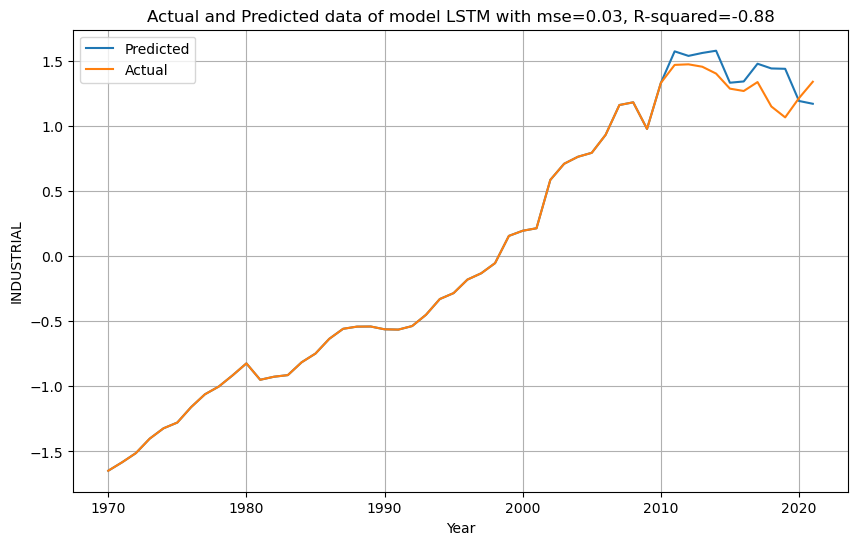

1/1 [==============================] - 0s 311ms/step


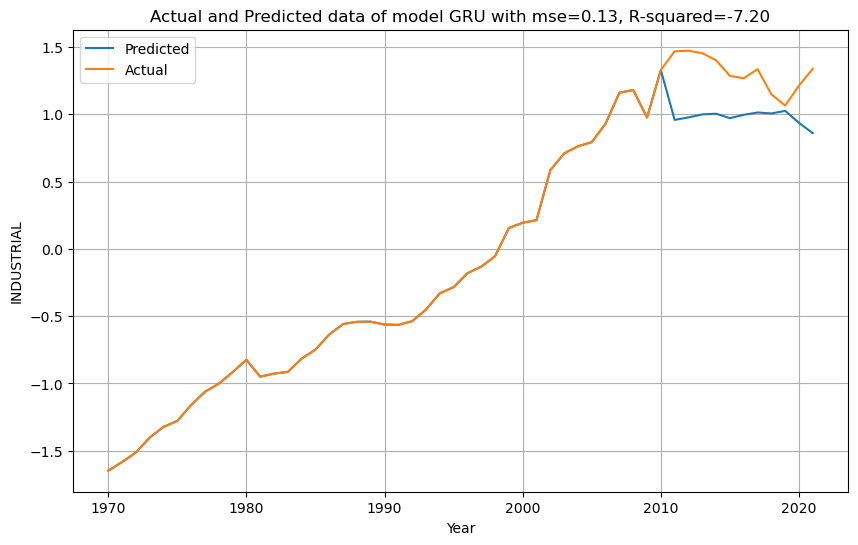

1/1 [==============================] - 0s 45ms/step


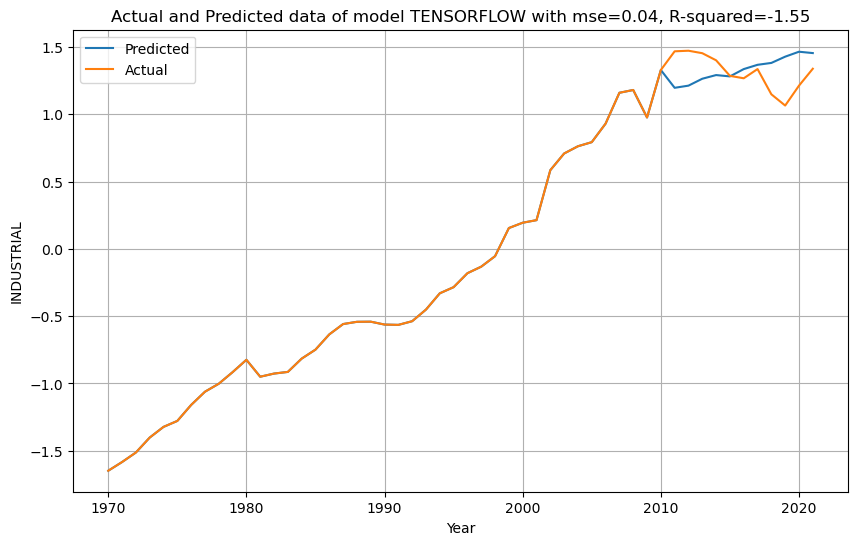

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


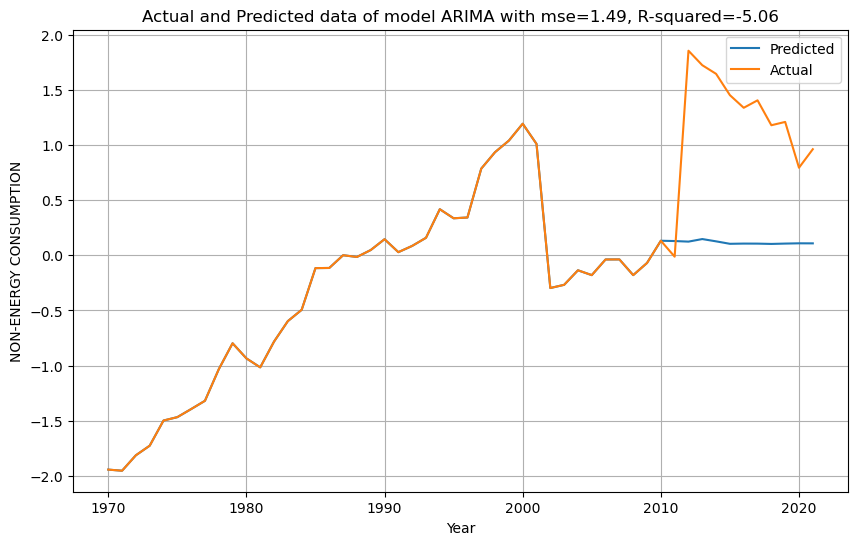

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75713D-01    |proj g|=  1.96182D-01

At iterate    5    f=  1.70892D-01    |proj g|=  7.11744D-03

At iterate   10    f=  1.70810D-01    |proj g|=  1.22928D-03

At iterate   15    f=  1.70571D-01    |proj g|=  2.01939D-02

At iterate   20    f=  1.69559D-01    |proj g|=  1.21994D-02

At iterate   25    f=  1.69182D-01    |proj g|=  6.08193D-03

At iterate   30    f=  1.69093D-01    |proj g|=  8.43002D-03

At iterate   35    f=  1.69071D-01    |proj g|=  6.20377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


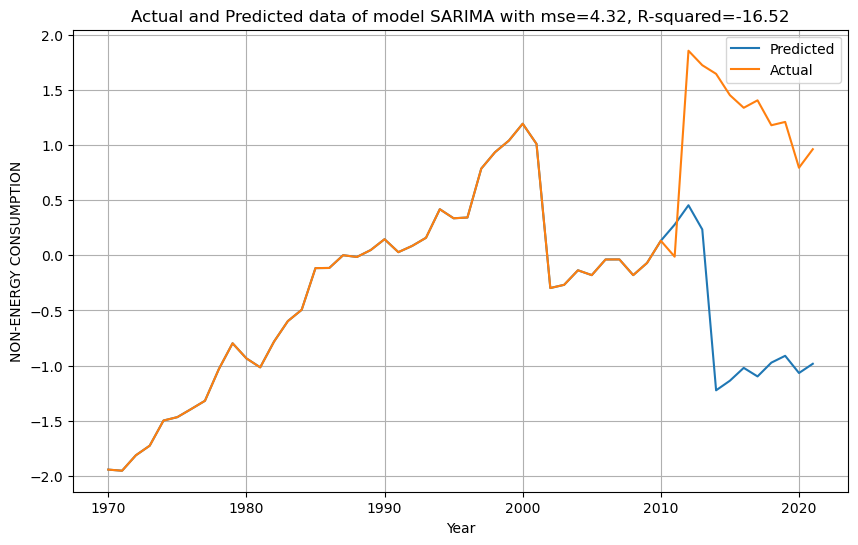

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


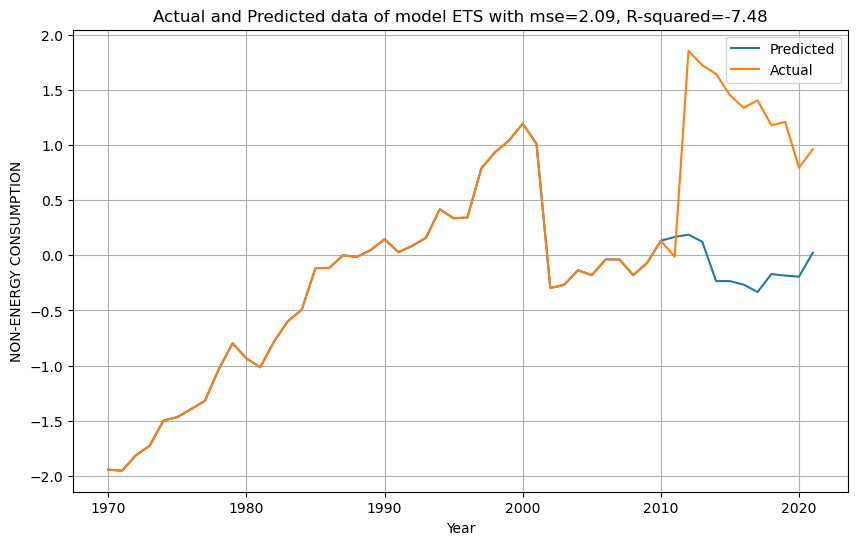

1/1 [==============================] - 0s 302ms/step


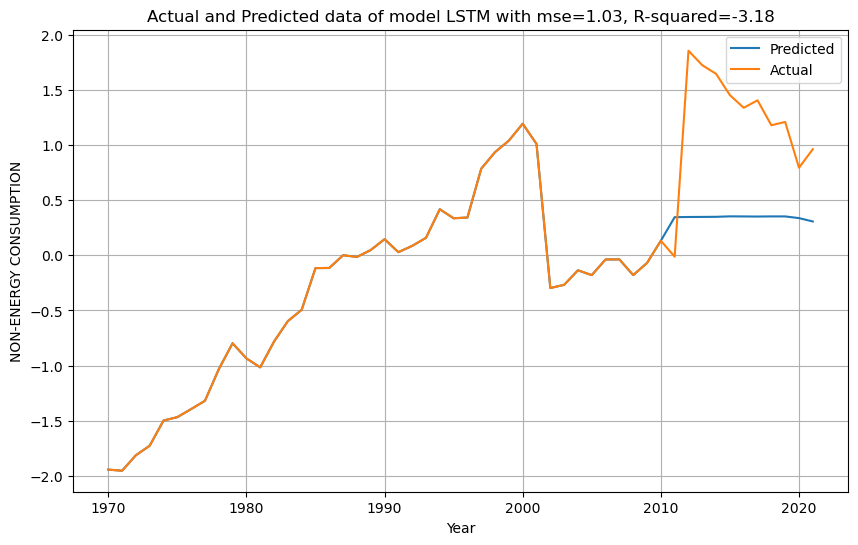

1/1 [==============================] - 0s 291ms/step


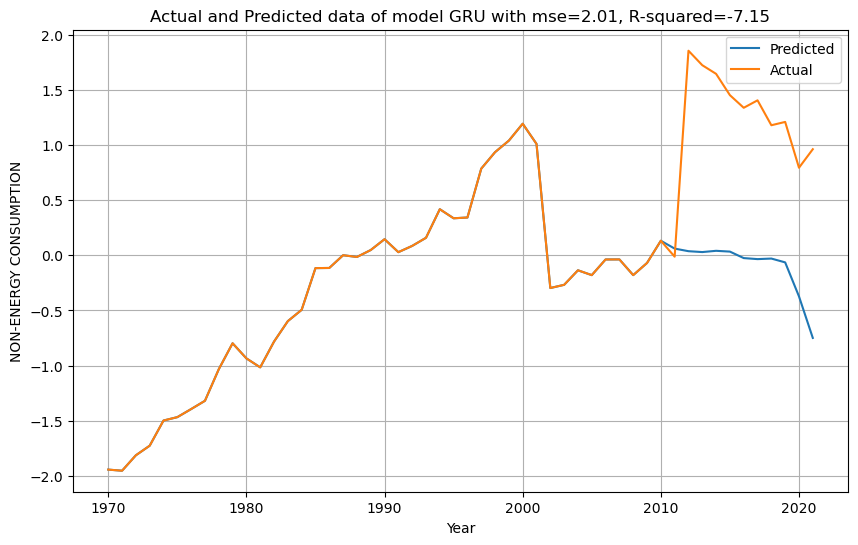

1/1 [==============================] - 0s 42ms/step


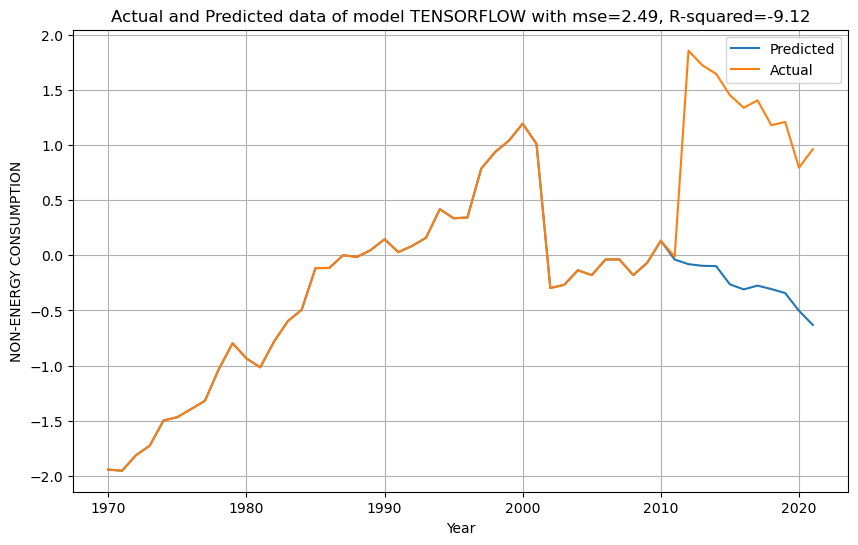

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


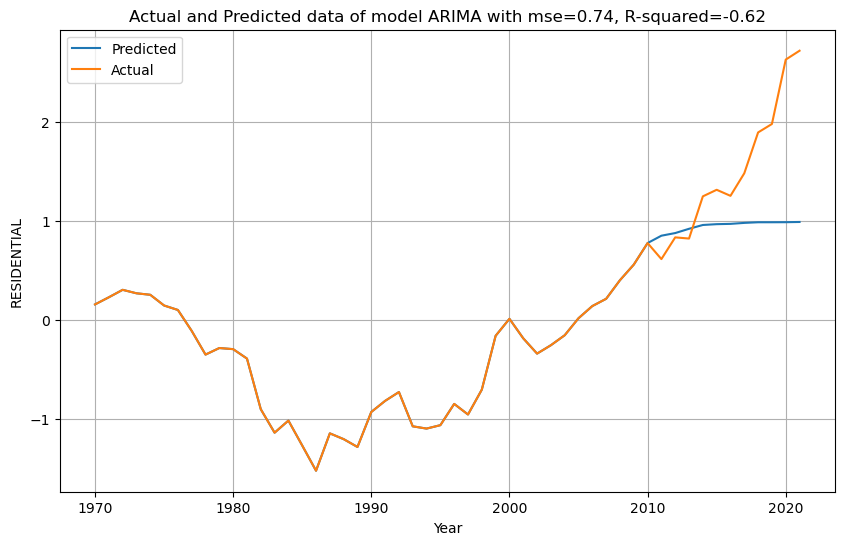

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42042D-02    |proj g|=  2.23461D-01

At iterate    5    f=  2.41560D-02    |proj g|=  8.27315D-02

At iterate   10    f=  2.29885D-03    |proj g|=  1.58738D-02

At iterate   15    f=  1.62748D-03    |proj g|=  2.17102D-02

At iterate   20    f=  6.38890D-04    |proj g|=  6.88767D-02

At iterate   25    f= -2.69958D-04    |proj g|=  6.57126D-03

At iterate   30    f= -4.38497D-04    |proj g|=  4.91613D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


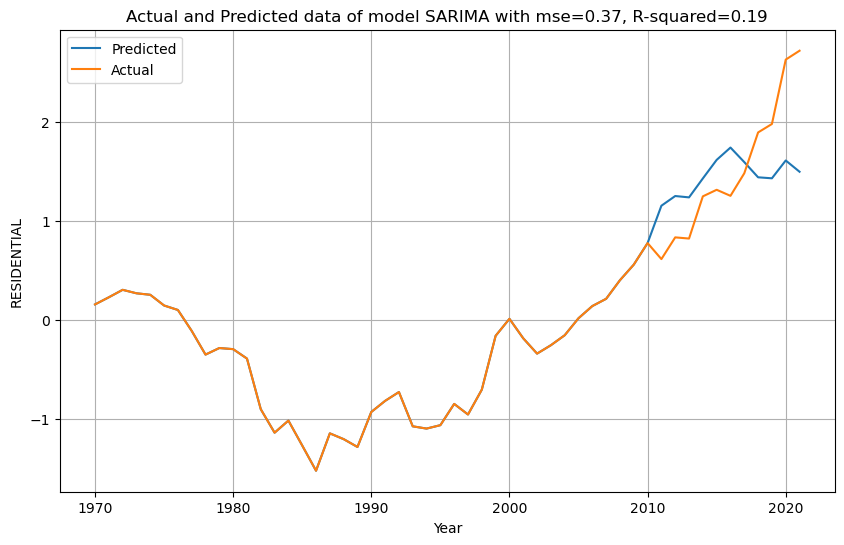

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


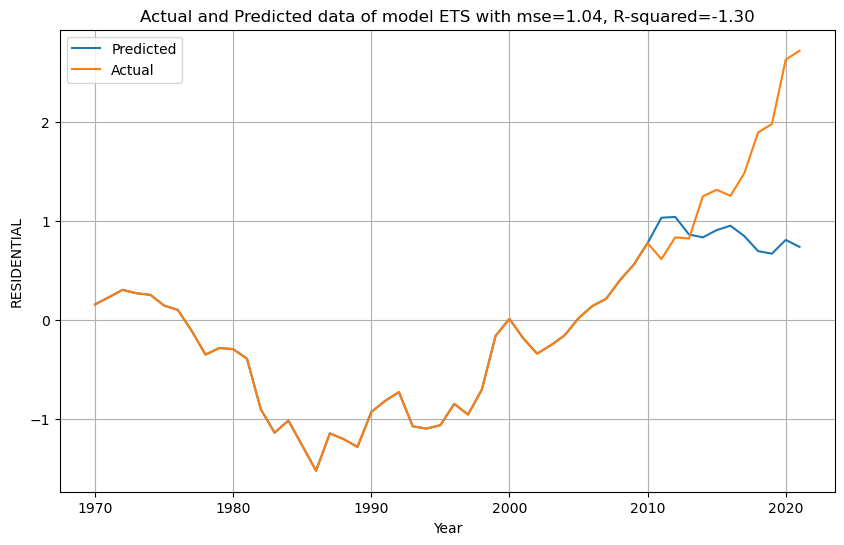

1/1 [==============================] - 0s 301ms/step


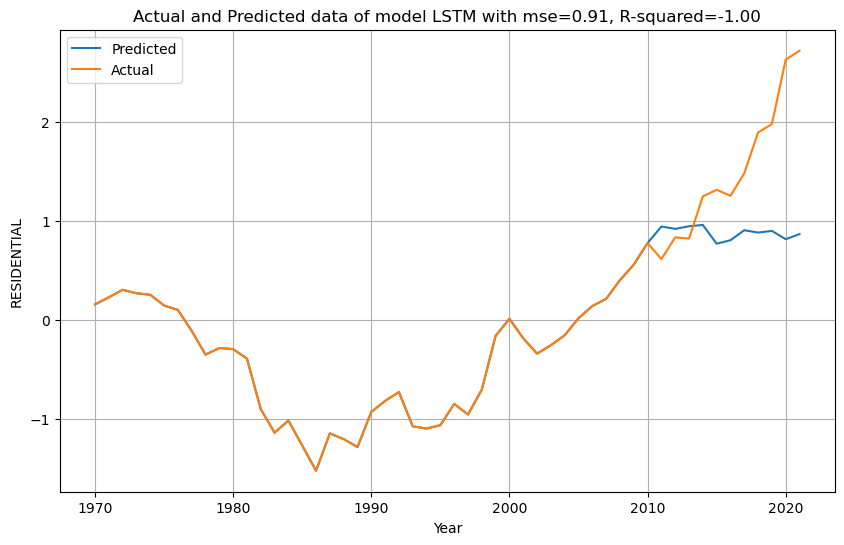

1/1 [==============================] - 0s 264ms/step


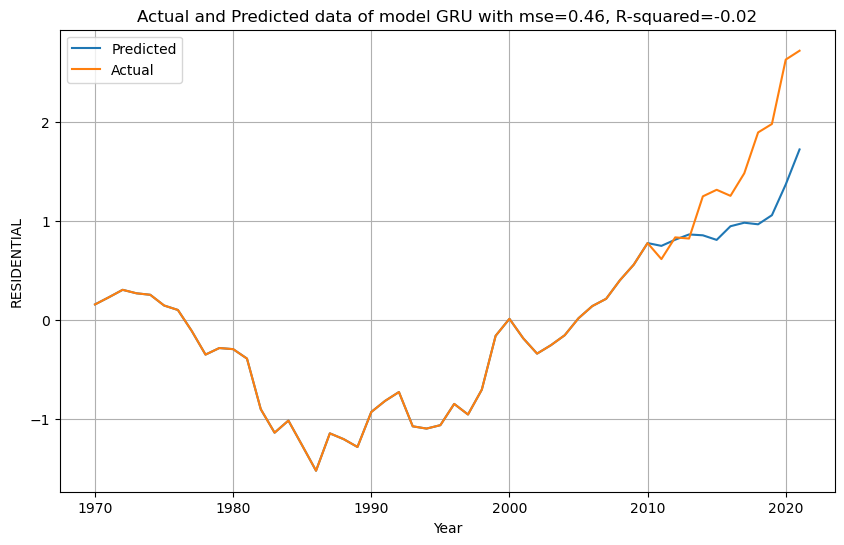

1/1 [==============================] - 0s 46ms/step


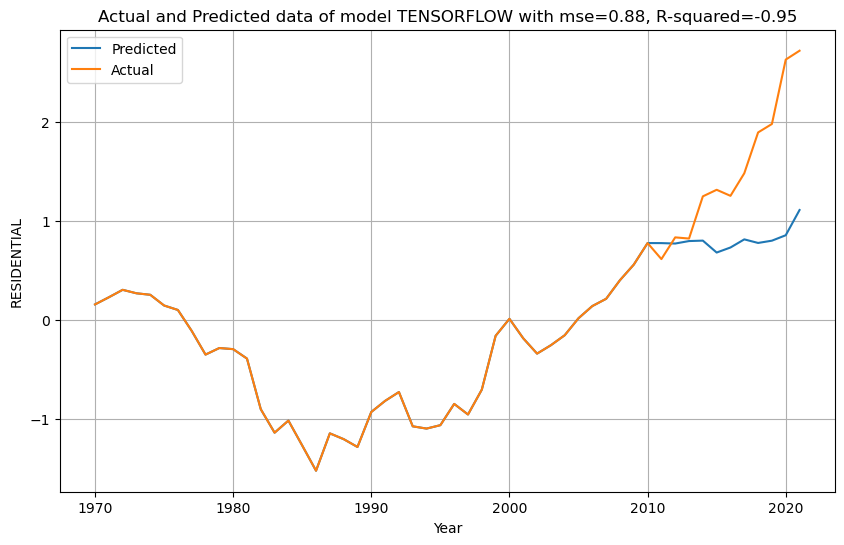

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


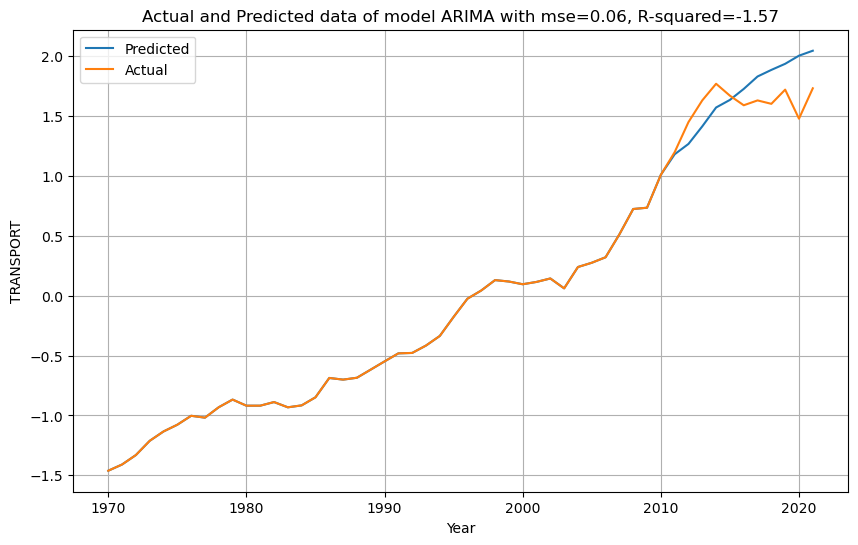

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.15591D-01    |proj g|=  3.48452D-01

At iterate    5    f= -7.55100D-01    |proj g|=  8.60715D-02

At iterate   10    f= -7.62487D-01    |proj g|=  9.64872D-01

At iterate   15    f= -7.70605D-01    |proj g|=  2.21459D-01

At iterate   20    f= -7.74313D-01    |proj g|=  1.38098D-01

At iterate   25    f= -7.75875D-01    |proj g|=  2.01792D-01

At iterate   30    f= -7.76818D-01    |proj g|=  4.29562D-02

At iterate   35    f= -7.78544D-01    |proj g|=  3.93267D-01

At iterate   40    f= -7.86137D-01    |proj g|=  1.83297D-02

At iterate   45    f= -7.88758D-01    |proj g|=  2.76865D-02

At iterate   50    f= -7.90074D-01    |proj g|=  2.26388D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


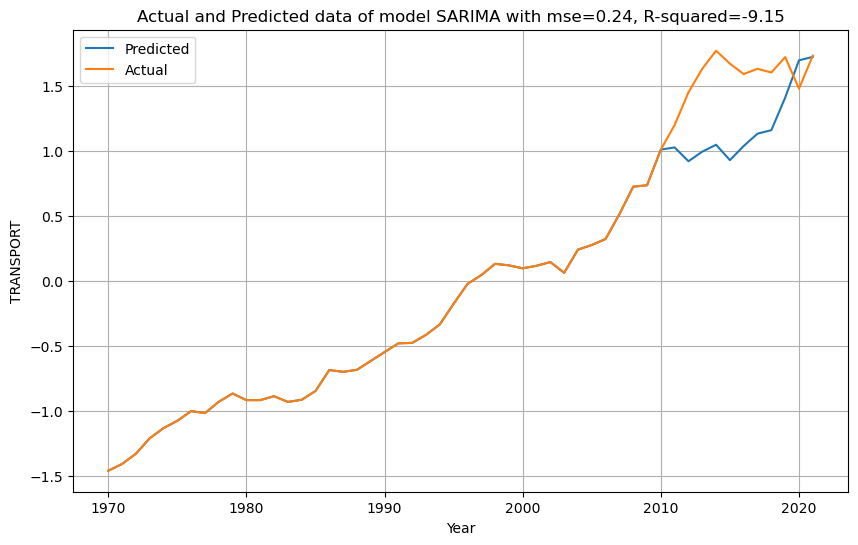

/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/namnguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


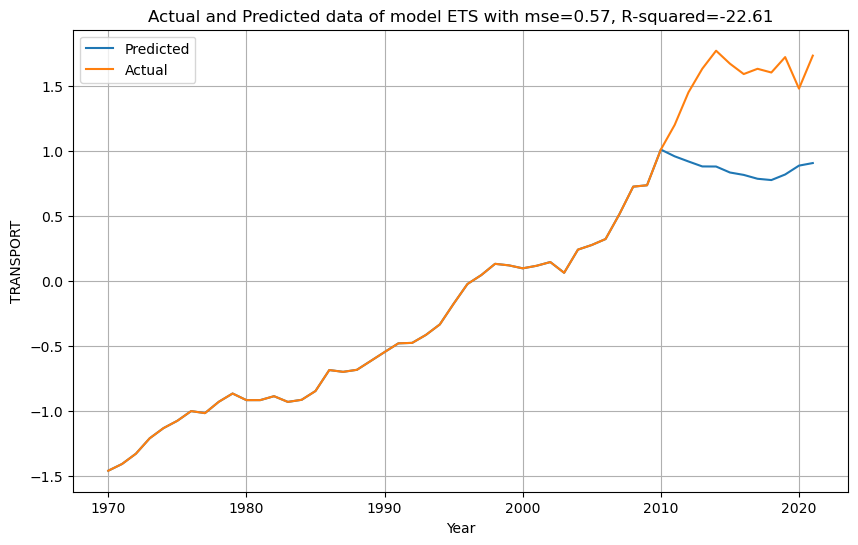

1/1 [==============================] - 0s 306ms/step


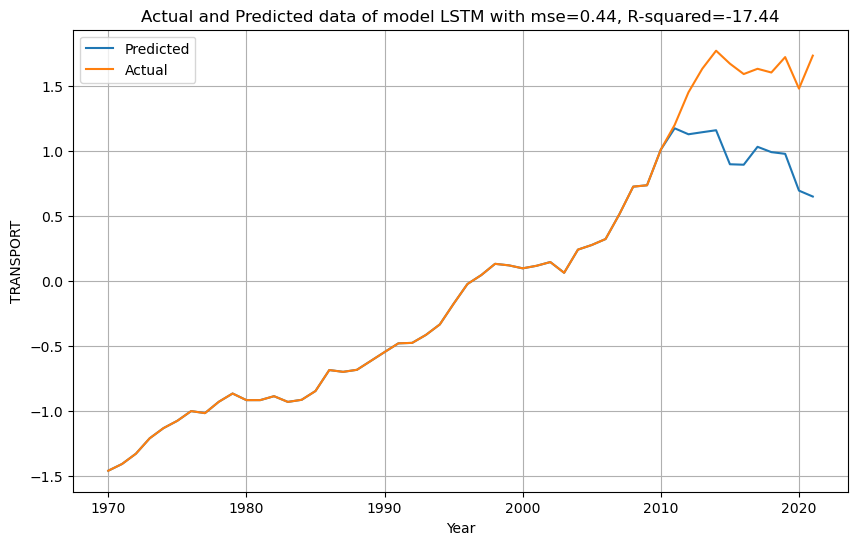

1/1 [==============================] - 0s 306ms/step


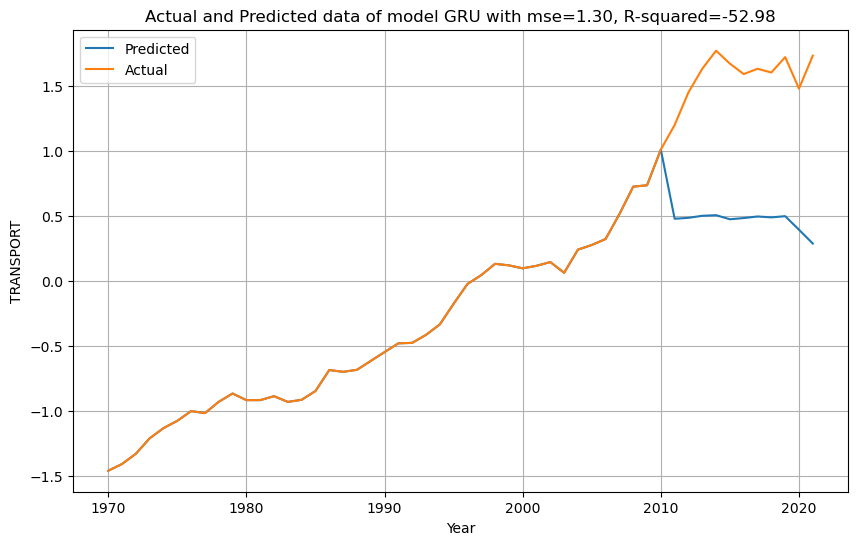

1/1 [==============================] - 0s 52ms/step


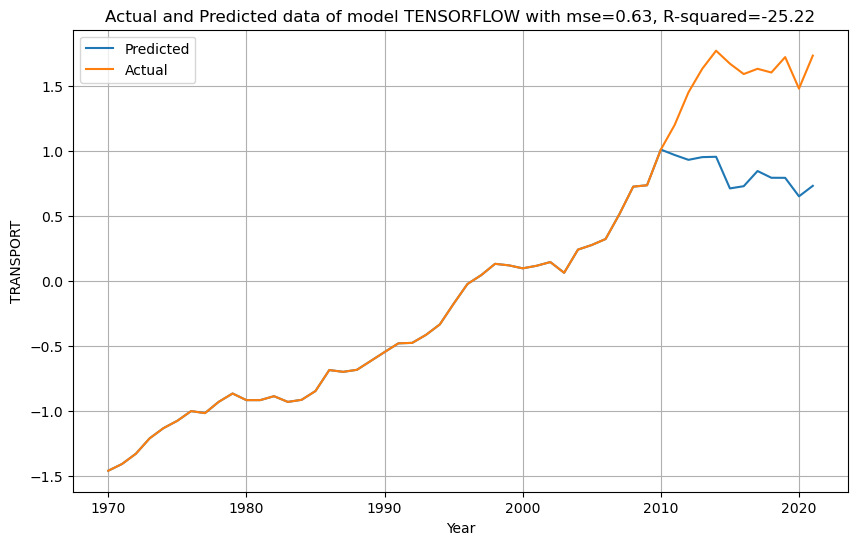

In [154]:
columns=["SECTOR", "model_name", "MSE"]
df_BEST_MODELS=pd.DataFrame(columns= columns)
for target in SECTORS: 
    
    # Split data into train and test sets 
    train_size = int(len(scaled_df) * 0.80)
    train, test = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]  
    X_train = train[FEATURES]
    X_test = test[FEATURES]
    y_train = train[target]   
    y_test = test[target]
    
    models=["ARIMA","SARIMA", "ETS","LSTM", "GRU","TENSORFLOW"]
    results=[]
    for model_name in models:
        res=Execute_model(model_name=model_name,test=test,train=train, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, FEATURES=FEATURES, target=target)
    
        results.append(res)
    
    #best_accuracy=max(result['Accuracy'] for result in results)
    min_mse = min(result['mse'] for result in results)
    best_model = next(result['model_name'] for result in results if result['mse'] == min_mse)   
    result_dict = {'SECTOR': target, 'model_name': best_model, 'MSE': f"{min_mse:.2f}"}
    df_BEST_MODELS = pd.concat([df_BEST_MODELS, pd.DataFrame([result_dict])], ignore_index=True)
    
    

    

In [131]:
df_BEST_MODELS

,SECTOR,model_name,MSE
0,"AGRICULTURE, FISHING AND MINING",GRU,0.13
1,"COMMERCIAL, SERVICES, PUBLIC",ARIMA,0.03
2,INDUSTRIAL,ETS,0.01
3,NON-ENERGY CONSUMPTION,LSTM,0.96
4,RESIDENTIAL,SARIMA,0.37
5,TRANSPORT,ARIMA,0.06
